## Download a csv from a jupyter notebook

In [ ]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Practice GroupBy operations with Video Games Sales data

## Introduction

This lab focuses on grouping and aggregation using the Video Games Sales dataset. You'll be working with the dataset to practice the following skills:

- Grouping the data based on one or multiple columns using the groupby function.
- Applying built-in functions like ``mean``, ``sum``, ``size``, and describe to aggregated groups.
- Using different aggregation functions for different columns using ``.agg`` or ``.aggregate``, including custom defined functions.
- Applying advanced custom functions using ``.apply``.
- Utilizing the ``.transform`` function to apply transformations to groups while preserving the original DataFrame shape.

### The Dataset used

For this lab, we will be using the Video Games Sales dataset from Kaggle. The dataset contains information about video game sales, including the game title, platform, genre, publisher, and sales figures in different regions. It provides a comprehensive overview of the video game industry.

### Analysis and activities

In this lab, you will apply grouping and aggregation techniques to answer various questions about the video game sales dataset. You will group the data by different columns, calculate statistics such as mean and sum, analyze trends over time, identify top performers, and explore regional preferences for platforms, genres, and publishers.

Begin by going through the reading material and analysis sections of the lab notebook. Once you feel comfortable, proceed to the activities section to practice your skills and gain a deeper understanding of grouping and aggregating data with pandas.

In [1]:
import pandas as pd

In [2]:
games_sales_df = pd.read_csv('files/vgsales.csv')

In [3]:
games_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Discovering the dataset

In [4]:
#show the number of cells in the dataframe
print("video games dataframe size: ", games_sales_df.size)

#show the number of records (rows) in the dataframe
print("number of games: ", len(games_sales_df))

video games dataframe size:  182578
number of games:  16598


In [5]:
games_sales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

1. Calculate the total global sales for each ``Platform``

    Store the resulting series in the variable ``total_global_sales_by_platform``.

In [6]:
total_global_sales_by_platform = games_sales_df.groupby(['Platform']).sum()['Global_Sales']
total_global_sales_by_platform

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

2. Find the top-selling genre based on global sales

    Note: The top-selling genre is the genre that has the maximum sum of ``Global_Sales``.

In [7]:
top_selling_genre = games_sales_df.groupby(['Genre']).sum()['Global_Sales'].sort_values(ascending = False)

In [8]:
games_sales_df.groupby('Genre')['Global_Sales'].sum().idxmax()

'Action'

3. Create a bar chart to visualize the sum of ``Global_Sales`` per ``Genre``

    Store the resulting chart in the variable ``global_sales_chart``.

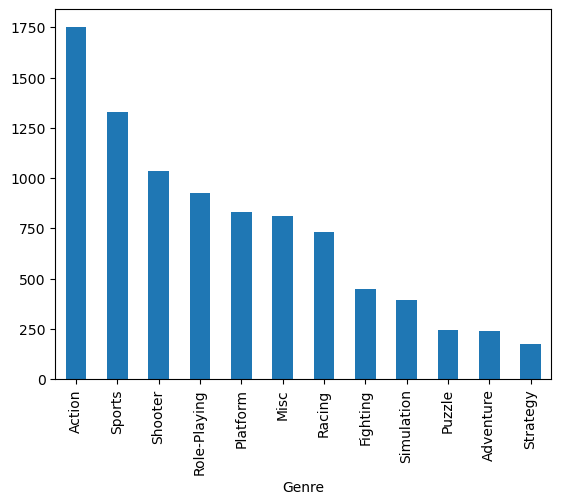

In [9]:
global_sales_chart = top_selling_genre.plot(kind = 'bar')

4. Calculate the average global sales for each ``Publisher``

    Store the resulting dataframe in the variable ``avg_sales_per_publisher``.

In [10]:
avg_sales_per_publisher = games_sales_df.groupby(['Publisher'])['Global_Sales'].mean().reset_index()
avg_sales_per_publisher

,Publisher,Global_Sales
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.281111
...,...,...
573,id Software,0.030000
574,imageepoch Inc.,0.020000
575,inXile Entertainment,0.100000
576,"mixi, Inc",0.860000


5. Calculate the total ``EU_Sales`` for each platform-year combination

    Store the resulting series in the variable ``platform_year_eu_sales``.

In [11]:
platform_year_eu_sales = games_sales_df.groupby(['Platform', 'Year'])['EU_Sales'].sum()
platform_year_eu_sales

Platform  Year  
2600      1980.0     0.67
          1981.0     1.96
          1982.0     1.65
          1983.0     0.34
          1984.0     0.01
                    ...  
XB        2008.0     0.04
XOne      2013.0     5.29
          2014.0    17.75
          2015.0    17.98
          2016.0     4.63
Name: EU_Sales, Length: 241, dtype: float64

6. Find the number of publishers in each ``Platform``

    Calculate the number of publishers within each "Platform" and store the resultant dataframe in the variable ``no_publisher_per_platform``. The "Publishers_Count" column in ``no_publisher_per_platform`` should store the publisher count.

In [12]:
no_publisher_per_platform = games_sales_df.groupby(['Platform'])['Publisher'].nunique().reset_index(name = 'Publishers_Count')#.rename(columns={'Publisher':'Publishers_Count'})
no_publisher_per_platform

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


Otra solución

In [13]:
games_sales_df.groupby('Platform')['Publisher'].apply(lambda x: x.nunique()).reset_index(name='Publishers_Count')

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


7. Find the publisher with the most occurences for each ``Platform``

    Store the resulting dataframe in the variable ``most_frequent_publisher_platform``.

    Note: return the publisher with the smallest lexicographical name in case there is a tie in the number of occurences.

In [14]:
most_frequent_publisher_platform = games_sales_df.groupby('Platform')['Publisher'].agg(lambda x: x.mode().min()).reset_index()
most_frequent_publisher_platform

,Platform,Publisher
0,2600,Atari
1,3DO,Imageworks
2,3DS,Namco Bandai Games
3,DC,Sega
4,DS,Ubisoft
5,GB,Nintendo
6,GBA,THQ
7,GC,Electronic Arts
8,GEN,Sega
9,GG,Sega


8. Find the publisher with the highest total global sales for each ``Year``

    Store the resulting dataframe in the variable ``top_publisher_year``.

In [15]:
top_publisher_year = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index().sort_values(['Year', 'Global_Sales'], ascending = True).drop_duplicates('Year',keep='last').reset_index(drop= True)
top_publisher_year.rename(columns={'Publisher':'Top_Selling_Publisher','Global_Sales':'Global_Sales_Sum'}, inplace = True)

Otra solución

In [16]:
yearly_publisher_sales = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum()
yearly_publisher_sales

Year    Publisher                   
1980.0  Activision                      3.02
        Atari                           8.36
1981.0  20th Century Fox Video Games    1.35
        Activision                      8.50
        Atari                           8.45
                                        ... 
2016.0  Yeti                            0.02
        dramatic create                 0.03
2017.0  Idea Factory                    0.01
        Sega                            0.04
2020.0  Ubisoft                         0.29
Name: Global_Sales, Length: 2321, dtype: float64

In [17]:
top_publisher_year = yearly_publisher_sales.groupby('Year').idxmax().apply(lambda x: x[1]).reset_index(name='Top_Selling_Publisher')
top_publisher_year

,Year,Top_Selling_Publisher
0,1980.0,Atari
1,1981.0,Activision
2,1982.0,Atari
3,1983.0,Nintendo
4,1984.0,Nintendo
5,1985.0,Nintendo
6,1986.0,Nintendo
7,1987.0,Nintendo
8,1988.0,Nintendo
9,1989.0,Nintendo


In [18]:
top_publisher_year['Global_Sales_Sum'] = top_publisher_year.apply(lambda row: yearly_publisher_sales.loc[row['Year'], row['Top_Selling_Publisher']], axis=1)

In [19]:
top_publisher_year

,Year,Top_Selling_Publisher,Global_Sales_Sum
0,1980.0,Atari,8.36
1,1981.0,Activision,8.50
2,1982.0,Atari,19.43
3,1983.0,Nintendo,10.96
4,1984.0,Nintendo,45.56
5,1985.0,Nintendo,49.95
6,1986.0,Nintendo,16.18
7,1987.0,Nintendo,11.95
8,1988.0,Nintendo,36.44
9,1989.0,Nintendo,63.88


9. Find the maximum sales year for each ``Genre``

    Store the resulting dataframe in the variable ``max_sales_year_per_genre``.

In [20]:
genre = games_sales_df.groupby(['Genre', 'Year'])['Global_Sales'].max().reset_index()
max_sales_year_per_genre = genre.sort_values(['Genre','Global_Sales'], ascending=True).drop_duplicates('Genre', keep='last')
max_sales_year_per_genre = max_sales_year_per_genre.sort_values('Global_Sales', ascending=False).reset_index(drop = True)
max_sales_year_per_genre

,Genre,Year,Global_Sales
0,Sports,2006.0,82.74
1,Platform,1985.0,40.24
2,Racing,2008.0,35.82
3,Role-Playing,1996.0,31.37
4,Puzzle,1989.0,30.26
5,Misc,2006.0,29.02
6,Shooter,1984.0,28.31
7,Simulation,2005.0,24.76
8,Action,2013.0,21.40
9,Fighting,2008.0,13.04


Otra solución

In [21]:
max_sales_year_per_genre = games_sales_df.groupby('Genre')['Global_Sales'].idxmax()
max_sales_year_per_genre = games_sales_df.loc[max_sales_year_per_genre, ['Genre', 'Year', 'Global_Sales']]
max_sales_year_per_genre

,Genre,Year,Global_Sales
16,Action,2013.0,21.40
50,Adventure,1992.0,11.18
39,Fighting,2008.0,13.04
7,Misc,2006.0,29.02
1,Platform,1985.0,40.24
5,Puzzle,1989.0,30.26
2,Racing,2008.0,35.82
4,Role-Playing,1996.0,31.37
9,Shooter,1984.0,28.31
10,Simulation,2005.0,24.76


10. Compute descriptive statistics for each Genre using its ``Global_Sales``

    Store the resulting dataframe in the variable ``descriptive_genres``.

In [23]:
descriptive_genres = games_sales_df.groupby('Genre')['Global_Sales'].describe()
descriptive_genres

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


11. Calculate the total ``JP_Sales`` and average ``Other_Sales`` for each Platform

    Store the resulting dataframe in the variable ``jp_other_sales_platform``.

In [45]:
jp_other_sales_platform = games_sales_df.groupby('Platform').agg({'JP_Sales':'sum', 'Other_Sales':'mean'})
jp_other_sales_platform 

,JP_Sales,Other_Sales
Platform,,
2600,0.00,0.006842
3DO,0.10,0.000000
3DS,97.35,0.024813
DC,8.56,0.005192
DS,175.57,0.027984
GB,85.12,0.083673
GBA,47.33,0.009404
GC,21.58,0.009317
GEN,2.67,0.032963


12. Calculate the range (max-min) of ``NA_Sales`` for each ``Publisher``

    Store the resulting series in the variable ``max_min_diff_NAsales_per_publisher``.

In [51]:
def _range(series):
    return series.max() - series.min()

max_min_diff_NAsales_per_publisher = games_sales_df.groupby('Publisher')['NA_Sales'].agg(_range)
max_min_diff_NAsales_per_publisher

Publisher
10TACLE Studios                 0.06
1C Company                      0.01
20th Century Fox Video Games    0.53
2D Boy                          0.00
3DO                             1.09
                                ... 
id Software                     0.00
imageepoch Inc.                 0.00
inXile Entertainment            0.00
mixi, Inc                       0.00
responDESIGN                    0.05
Name: NA_Sales, Length: 578, dtype: float64

13. Calculate the percentage of ``Global_Sales`` contribution by each ``Platform``

    Store the resulting dataframe in the variable ``sales_percentage_by_platform``.

In [61]:
games_sales_df.groupby('Platform')['Global_Sales'].sum()

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

In [72]:
sales_percentage_by_platform = games_sales_df.groupby('Platform').agg(sales_percentage = ('Global_Sales', 'sum')).reset_index()
sales_percentage_by_platform['sales_percentage'] = sales_percentage_by_platform['sales_percentage'] / games_sales_df['Global_Sales'].sum() * 100
sales_percentage_by_platform

,Platform,sales_percentage
0,2600,1.088287
1,3DO,0.001121
2,3DS,2.774078
3,DC,0.179027
4,DS,9.220285
5,GB,2.863648
6,GBA,3.570452
7,GC,2.234867
8,GEN,0.317922
9,GG,0.000448


Otra solución

In [ ]:
sales_by_platform = games_sales_df.groupby('Platform')['Global_Sales'].sum()
sales_percentage_by_platform = sales_by_platform.apply(lambda x: (x/sales_by_platform.sum())*100).reset_index(name='sales_percentage')

14. Which platforms for playing video games have been the most popular each year?

    Store the resulting series in the variable ``popular_platform_per_year``.

In [84]:
yearly_platform_sales = games_sales_df.groupby(['Year', 'Platform'])['Global_Sales'].sum()
top_platform_year = yearly_platform_sales.groupby('Year').idxmax().apply(lambda x: x[1])
top_platform_year

Year
1980.0    2600
1981.0    2600
1982.0    2600
1983.0     NES
1984.0     NES
1985.0     NES
1986.0     NES
1987.0     NES
1988.0     NES
1989.0      GB
1990.0    SNES
1991.0    SNES
1992.0    SNES
1993.0    SNES
1994.0    SNES
1995.0      PS
1996.0      PS
1997.0      PS
1998.0      PS
1999.0      PS
2000.0      PS
2001.0     PS2
2002.0     PS2
2003.0     PS2
2004.0     PS2
2005.0     PS2
2006.0     Wii
2007.0     Wii
2008.0     Wii
2009.0     Wii
2010.0    X360
2011.0     PS3
2012.0     PS3
2013.0     PS3
2014.0     PS4
2015.0     PS4
2016.0     PS4
2017.0     PS4
2020.0      DS
Name: Global_Sales, dtype: object

15. Which genres have been more or less popular with the passing of time?

    Store the resulting dataframe in the variable ``genre_popularity_over_time``.

In [91]:
genre_popularity_over_time = games_sales_df.groupby(['Year', 'Genre'])['Genre'].count().unstack(fill_value = 0)
genre_popularity_over_time

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0
1985.0,2,0,1,0,4,4,0,0,1,1,1,0
1986.0,6,0,0,0,6,0,1,1,4,0,3,0
1987.0,2,1,2,0,2,0,0,3,2,0,4,0
1988.0,2,0,0,0,4,1,1,3,1,1,2,0


16. Calculate the z-score normalization for ``Global_Sales`` for each ``Genre``

    Store the result in a new column ``Global_Sales_Normalized`` in the original dataframe ``games_sales_df``.

In [93]:
key = lambda x : x.Global_Sales

zscore = lambda x: (x - x.mean()) / x.std()

t = .transform(zscore)
t

TypeError: Could not convert string 'Grand Theft Auto VGrand Theft Auto: San AndreasGrand Theft Auto VGrand Theft Auto: Vice CityGrand Theft Auto IIIGrand Theft Auto VPokemon HeartGold/Pokemon SoulSilverGrand Theft Auto IVGrand Theft Auto IVFIFA Soccer 13Grand Theft Auto: Liberty City StoriesThe Legend of Zelda: Ocarina of TimeThe Legend of Zelda: Twilight PrincessUncharted 3: Drake's DeceptionUncharted 2: Among ThievesRed Dead RedemptionThe Legend of ZeldaAssassin's Creed IIIRed Dead RedemptionDriverMetal Gear Solid 2: Sons of LibertyMetal Gear Solid 4: Guns of the PatriotsMetal Gear SolidThe Last of UsLEGO Star Wars: The Complete SagaResident Evil 2Assassin's Creed IIBatman: Arkham CityAssassin's Creed IIIAssassin's Creed IITomb Raider IIFIFA Soccer 13The Legend of Zelda: Phantom HourglassResident Evil 5Grand Theft Auto VGrand Theft Auto: Vice City StoriesResident EvilUncharted: Drake's FortuneLEGO Star Wars: The Complete SagaGod of War IIIBatman: Arkham CityDriver 2The Lord of the Rings: The Two TowersTomb RaiderThe Legend of Zelda: A Link to the PastThe Legend of Zelda: The Wind WakerLuigi's Mansion: Dark MoonThe Last of UsSpider-Man: The MovieUncharted: The Nathan Drake CollectionGod of WarBatman: Arkham AsylumAssassin's Creed: RevelationsMetal Gear Solid 3: Snake EaterThe Legend of Zelda: Ocarina of TimeAssassin's Creed: RevelationsTeenage Mutant Ninja TurtlesFroggerWatch DogsThe Legend of Zelda: Skyward SwordGod of War IIAssassin's Creed: UnityAssassin's Creed IV: Black FlagThe Legend of Zelda: Link's AwakeningBatman: Arkham KnightLEGO Indiana Jones: The Original AdventuresResident Evil Director's CutHarry Potter and the Sorcerer's StoneResident Evil 3: NemesisResident Evil 4Luigi's MansionGrand Theft Auto: Liberty City StoriesThe GetawayTomb Raider III: Adventures of Lara CroftLEGO Star Wars: The Video GameRugrats in Paris: The MovieResident Evil 5Assassin's Creed: BrotherhoodKung FuBatman: Arkham AsylumAssassin's Creed: UnityGrand Theft Auto 2Spider-Man 2LEGO Batman: The VideogameMetal Gear Solid V: The Phantom PainThe Legend of Zelda: Spirit TracksThe Legend of Zelda: Majora's MaskAssassin's Creed IV: Black FlagStar Wars Episode III: Revenge of the SithThe Lord of the Rings: The Return of the KingAssassin's Creed SyndicateTrue Crime: Streets of LAMonster Hunter XGod of War: Chains of OlympusEnter the MatrixLEGO Batman: The VideogameLEGO Batman: The VideogameSpider-ManThe Legend of Zelda: A Link Between WorldsKung Fu PandaSaints Row 2Tom Clancy's Splinter CellMiddle-Earth: Shadow of MordorDevil May CryHitman 2: Silent AssassininFAMOUSSkylanders: Spyro's AdventureAssassin's Creed: BrotherhoodFinding NemoStar Wars: The Force UnleashedinFAMOUS: Second SonSaints Row: The ThirdAssassin's Creed IV: Black FlagMetroidThe Legend of Zelda: A Link to the PastOnimusha: WarlordsLEGO Star Wars II: The Original TrilogyHannah MontanaTom Clancy's Splinter CellSkylanders GiantsStar Wars: Shadows of the EmpireLEGO Star Wars: The Complete SagaGod of War CollectionHarry Potter and the Chamber of SecretsStreets of RageGhostbusters: The Video Game (DS Version)Perfect DarkTomb Raider (2013)Saints Row: The ThirdRockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice CityLEGO Harry Potter: Years 1-4Tomb Raider: The Last RevelationDino CrisisLEGO Indiana Jones: The Original AdventuresBatman: Arkham OriginsDead IslandLEGO Star Wars: The Complete SagaBloodborneThe IncrediblesLEGO Harry Potter: Years 1-4Resident Evil - Code: Veronica XThe Legend of Zelda: Majora's Mask 3DGrand Theft AutoLEGO Marvel Super HeroesGuild Wars 2Dead IslandTomb Raider IIGod of War: AscensionYokai Watch BustersStar Wars: The Force UnleashedResident Evil 4Teenage Mutant Ninja Turtles II: The Arcade GameLEGO Indiana Jones: The Original AdventuresPrince of Persia: The Sands of TimeAssassin's Creed IV: Black FlagDevil May Cry 3: Dante's Awakening Special EditionFroggerPro Evolution Soccer 2012Saints RowHitman: AbsolutionFar Cry: PrimalToy Story 3: The Video GameDynasty Warriors 4Project Gotham Racing (JP weekly sales)Devil May Cry 3: Dante's AwakeningDead RisingFinding NemoNBA 2K11Metal Gear Solid: Peace WalkerGhostbusters: The Video Game (DS Version)Tom Clancy's Splinter Cell: ConvictionThe IncrediblesPeter Jackson's King Kong: The Official Game of the MovieNeed for Speed: The RunDead SpaceLEGO Marvel Super HeroesTenchu: Stealth AssassinsHarry Potter and the Chamber of SecretsHarry Potter and the Chamber of SecretsDevil May Cry 2E.T.: The Extra TerrestrialGrand Theft Auto: San AndreasBatman: Arkham OriginsWatch DogsTomb Raider (2013)The Legend of Zelda: Oracle of AgesStar Wars: The Force UnleashedLEGO Star Wars III: The Clone WarsDynasty Warriors 3Phineas and FerbGoldenEye 007 (2010)PinballinFAMOUS 2Just Cause 3The Evil WithinNBA 2K11Kinect Star WarsSpongeBob SquarePants: SuperSpongeThe Getaway: Black MondayJust Cause 2The Legend of Zelda: The Wind Waker50 Cent: BulletproofState of EmergencyHitman: Absolution2 Games in 1 Double Pack: The Incredibles / Finding Nemo: The Continuing AdventuresTwisted Metal IIIHarry Potter and the Sorcerer's StoneDisney InfinityDishonoredRockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice CityBen 10: Protector of EarthSaints Row 2Saints Row IVHarry Potter and the Sorcerer's StoneResident Evil 4Call of Duty Black Ops: DeclassifiedLEGO Batman 2: DC Super HeroesStar Wars The Clone Wars: Lightsaber DuelsMetroid FusionDying LightHeavenly SwordLEGO Pirates of the Caribbean: The Video GameGhosts 'n GoblinsPrince of Persia: Warrior WithinJust Cause 2SpongeBob's Atlantis SquarePantisDollar DashFar Cry 2Silent HillNo Man's SkyThe Legend of Zelda: Twilight PrincessDevil May Cry 4LEGO Harry Potter: Years 1-4Kingdom Hearts 3D: Dream Drop DistanceHannah Montana: Music JamTwisted MetalFinal FightLEGO Marvel Super HeroesMafia IIDishonored007: The World is not EnoughSpider-Man 2: Enter: ElectroWatch DogsStar Wars: The Force Unleashed IIDead Rising 3Resident Evil: The Umbrella ChroniclesThe Simpsons GameMafia IIPac-Man World 2LEGO Star Wars III: The Clone WarsMega Man 2The Simpsons GameDead Rising 2Pac-Man World007: Quantum of SolaceTom Clancy's Splinter Cell: Pandora TomorrowAssassin's Creed III: LiberationMario GolfMetal Gear Rising: RevengeanceStar Wars: The Force Unleashed IILEGO Batman 2: DC Super HeroesMedal of Honor: WarfighterOnimusha 3: Demon SiegeBatman: Arkham KnightResident Evil: OutbreakFrogger 2: Swampy's RevengeDisney InfinityLEGO Indiana Jones 2: The Adventure ContinuesThe Legend of Zelda: The Minish CapSuper MetroidDead SpaceResident Evil (Remake)Tomb Raider (2013)LEGO Star Wars II: The Original TrilogyToy Story 3: The Video GameLEGO Star Wars: The Video GameMetroid: Other MSpider-Man: The MovieFar Cry 2Bakugan: Battle BrawlersTeenage Mutant Ninja Turtles III: The Manhattan ProjectDynasty Warriors 5Hannah Montana: Spotlight World TourWWE '13True Crime: Streets of LADead Rising 2Need for Speed: The RunLEGO Indiana Jones: The Original AdventuresAssassin's Creed: RogueLEGO Harry Potter: Years 1-4Ryse: Son of RomeLEGO Harry Potter: Years 5-7Grand Theft Auto: Chinatown WarsAlan WakeSamurai WarriorsDevil May Cry 4Crysis 2Spider-Man: The MovieMiddle-Earth: Shadow of MordorLEGO Batman: The VideogameThe LEGO Movie VideogameSkylanders GiantsLEGO Batman: The Videogame[Prototype]Crysis 2Saints Row IVResident Evil ZeroWatch DogsMetal Gear Solid V: Ground ZeroesAssassin's Creed SyndicateArmy Men 3DWWE '13ManhuntKid Icarus: UprisingSilent Hill 2Tomb Raider: UnderworldLEGO Batman: The VideogameJet Li: Rise to HonorYokai Watch 3Kung Fu PandaHyrule WarriorsRatatouilleLEGO The Lord of the RingsStar Wars: The Force UnleashedCombatLara Croft Tomb Raider: The Angel of DarknessTom Clancy's Splinter Cell: Pandora TomorrowTransformers: Autobots / Decepticons[Prototype]Assassin's Creed: BloodlinesRidge Racer VStar Wars Episode III: Revenge of the SithBen 10: Protector of EarthNinja GaidenBayonettaLEGO Batman 2: DC Super HeroesLEGO Indiana Jones 2: The Adventure ContinuesStar Wars Episode 1: Jedi Power BattlesDino Crisis 2The Lord of the Rings: The Fellowship of the RingLEGO Star Wars III: The Clone WarsEnter the MatrixOne Piece: Pirate WarriorsMetal Gear Solid: Portable OpsScarface: The World is YoursHitman 2: Silent AssassinSpider-Man: The MovieResident Evil: Operation Raccoon CityLEGO Indiana Jones: The Original AdventuresMedal of Honor: WarfighterMission: Impossible007: Quantum of SolaceLEGO Star Wars III: The Clone WarsLEGO Star Wars: The Video GameGauntlet: Dark LegacyNinja Gaiden SigmaRed Dead Redemption: Undead NightmareDoraemonPokemon Rumble BlastAction BassTenchu: Wrath of HeavenShadow of the ColossusCommandoResident Evil - Code: VeronicaThe Lord of the Rings: The Return of the KingLEGO Star Wars: The Video GameLEGO Star Wars III: The Clone WarsYakuza 3Dragon Age IICastlevania: Lords of ShadowDisney Infinity 2.0: Marvel Super HeroesSpider-Man 2Mad Max (2015)Transformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)Tom Clancy's Splinter Cell: Chaos TheoryToy Story 3: The Video GameThe Legend of Zelda: Tri Force HeroesLEGO The Lord of the RingsStar Wars: The Force UnleashedThe Simpsons GameLEGO Star Wars II: The Original TrilogyThe GodfatherDante's InfernoSkylanders GiantsPrince of PersiaGrand Theft Auto VResident Evil: The Darkside ChroniclesNCAA Football 13Grand Theft Auto: Chinatown WarsTomb Raider: UnderworldRed Dead Redemption: Undead NightmareBully: Scholarship EditionDisney UniverseLEGO Pirates of the Caribbean: The Video GameDarksidersSleeping DogsHulkLEGO Indiana Jones: The Original AdventuresSpider-Man 2Assassin's Creed: RogueSkylanders: Trap TeamUFC Undisputed 3The Simpsons GameGuinness World Records: The VideogameLegacy of Kain: Soul ReaverDisney TangledMega Man X4LEGO Indiana Jones 2: The Adventure ContinuesLEGO Marvel Super HeroesEpic Mickey 2: The Power of TwoThe Simpsons GameTomb RaiderZombiUFinal Fight 2The Lost World: Jurassic ParkDisney Infinity 2.0: Marvel Super HeroesHarry Potter and the Prisoner of AzkabanBayonetta 2Prince of PersiaGod of War: Ghost of SpartaNinja Gaiden IIThe LEGO Movie VideogameUFC Undisputed 3Dynasty Warriors 3: Xtreme LegendsDead Space 3Disney InfinityDead Space 3LEGO Harry Potter: Years 5-7Tom Clancy's Splinter Cell: BlacklistLEGO Pirates of the Caribbean: The Video GameScooby-Doo! First FrightsThe BouncerGrand Theft Auto: San AndreasTom Clancy's Splinter Cell: BlacklistPro Evolution Soccer 2014Brutal LegendYakuza 4Skylanders: Spyro's AdventureGrand Theft Auto: Vice City StoriesLEGO The Lord of the RingsLEGO Star Wars II: The Original TrilogyLEGO Harry Potter: Years 5-7PlayStation All-Stars Battle RoyaleLEGO Pirates of the Caribbean: The Video GameMega Man Star Force Dragon / Leo / PegasusThe Witcher 2: Assassins of KingsLEGO Jurassic WorldTom Clancy's Splinter Cell: Chaos TheoryBen 10: Alien ForceBrutal LegendSkylanders: Spyro's AdventureLego Batman 3: Beyond GothamThe Tomb Raider TrilogyAssassin's Creed IIICastlevania: Lament of InnocenceThe Witcher 2: Assassins of KingsBayonettaThe Legend of Zelda: Twilight Princess HDBullyPrince of Persia: The Sands of TimeLEGO Jurassic WorldSpider-ManTeenage Mutant Ninja TurtlesSkylanders: Trap TeamTeenage Mutant Ninja Turtles007: The World is not EnoughSpongeBob SquarePants: The Yellow AvengerDante's InfernoKung Fu PandaLego Batman 3: Beyond GothamDynasty Warriors 7The Evil WithinAvatar: The GameHarvest Moon 3D: A New BeginningLEGO Indiana Jones 2: The Adventure ContinuesThe Simpsons Game3XtremeStar Wars: The Force UnleashedLittleBigPlanet KartingLEGO Jurassic WorldFinding NemoLEGO Marvel Super HeroesSleeping DogsGrand Theft Auto IVGhostbusters: The Video GameResident Evil: RevelationsNBA 2K6Just Cause 3NCAA Football 13Scooby-Doo! First FrightsWarriors OrochiMonster Strike 3DSTomb Raider: AnniversaryDarksiders IIGhostbusters: The Video GameThe Lord of the Rings: War in the NorthThe Lord of the Rings: War in the NorthDynasty Warriors 4: Xtreme LegendsNinja Gaiden Sigma 2Army Men: Air AttackFar Cry: PrimalHarry Potter and the Order of the PhoenixRampage World TourRatatouilleKirby: Planet RobobotThief (2014)Spider-Man 2Devil May Cry HD CollectionMLB 16: The ShowThe IncrediblesDragon Age IIBen 10: Protector of EarthDynasty Warriors 2Lizzie McGuire 2: Lizzie DiariesThe Amazing Spider-Man (Console Version)Star Wars The Clone Wars: Republic HeroesCuster's RevengeDmC: Devil May CryTwisted Metal (2012)Disney's The Little Mermaid: Ariel's Undersea AdventureThe Legend of Zelda: Four Swords AdventuresArmy Men: Sarge's HeroesLego Batman 3: Beyond GothamDying LightBen 10: Alien ForceMadWorldYakuza[Prototype 2]Prince of Persia: Warrior WithinDarksiders IIResident Evil: RevelationsStar Wars: The Force Unleashed IIThe Godfather IIAlienStar Wars The Clone Wars: Jedi AllianceDead Island: RiptideDrawn to LifePokePark 2: Wonders BeyondTom Clancy's Splinter Cell: Double AgentGod of War SagaResident Evil: Operation Raccoon CityToy Story 3: The Video GameAvatar: The GameHarry Potter and the Half-Blood PrinceAir RaidCrystal CastlesStar Wars Episode II: Attack of the ClonesLEGO Batman 2: DC Super HeroesTwisted Metal: Head OnMercenaries: Playground of DestructionThe Lord of the Rings: ConquestAssassin's Creed: RevelationsTrue Crime: New York CityGenji: Days of the BladeThe Godfather IITurok[Prototype 2]Shark TaleThe Amazing Spider-Man (Console Version)X-Men Origins: Wolverine - Uncaged EditionMadagascar: Escape 2 AfricaAce Combat: Assault HorizonLEGO Batman 2: DC Super HeroesLEGO Marvel Super HeroesCrysis 2The Lord of the Rings: The Two TowersIndiana Jones and the Staff of KingsPirates of the Caribbean: At World's EndBeyblade VForce: Ultimate Blader JamRatchet & Clank CollectionAvatar: The GameStar Wars Episode III: Revenge of the SithUltimate Spider-ManFIFA Soccer 13God EaterKouchuu Ouja Mushi KingLEGO Harry Potter: Years 5-7TerrariaBen 10: Protector of EarthFear EffectThe Lord of the Rings: The Two TowersDragon Quest Heroes: The World's Tree Woe and the Blight BelowResident Evil: SurvivorDynasty Warriors 6Silent Hill 3Scooby-Doo 2: Monsters UnleashedPower Rangers: Dino ThunderBlast CorpsLEGO Harry Potter: Years 1-4Metal Gear Solid V: The Phantom PainSpider-Man 2Star Wars: Obi-WanF-14 TomcatSkylanders: Trap TeamPrince of Persia: The Forgotten SandsBook of SpellsMafiaMetal Gear Solid V: The Phantom PainKing KongThe LEGO Movie VideogameX-Men Origins: Wolverine - Uncaged EditionMetal Gear Solid: Portable Ops PlusDisney TangledShrek the ThirdMortal Kombat: Shaolin MonksSkylanders: Trap TeamOne Piece: Pirate Warriors 2Assassin's Creed IV: Black FlagHarry Potter and the Chamber of SecretsThe Lord of the Rings: The Return of the KingShark TaleKirby's Dream Collection: Special EditionBakugan: Battle BrawlersStar Wars: Masters of Teras KasiIron ManDisney Infinity 3.0Prince of Persia: The Two ThronesMetro: Last LightMercenaries: Playground of DestructionTurokLollipop ChainsawSpice WorldThe LEGO Movie VideogameRatatouilleCastlevania: Lords of Shadow007: Quantum of SolaceAdventures of TronThe Chronicles of Narnia: The Lion, The Witch and The WardrobeThe LEGO Movie VideogameFinding NemoFist of the North Star: Ken's RageToy Story 3: The Video GameKeystone KapersLEGO Marvel Super HeroesShrek: Hassle at the CastleGods Eater BurstTransformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)Disney Infinity 2.0: Marvel Super HeroesKung Fu PandaThe Evil WithinUpReal Heroes: FirefighterKung-Fu MasterHarry Potter and the Goblet of FireSengoku Basara: Samurai HeroesHarry Potter and the Half-Blood PrinceCrash of the TitansLEGO Marvel's AvengersDragon Age IILEGO Star Wars II: The Original TrilogyThe Lord of the Rings: ConquestOnimusha: Dawn of DreamsGravity RushLEGO DimensionsOkamiMiddle-Earth: Shadow of MordorNightmare CreaturesGhostbusters: The Video GameDisney UniverseIron ManHarry Potter and the Half-Blood PrinceAngry Birds TrilogyCondemned 2: BloodshotGod of War IIIX-ManOkamiLEGO Jurassic WorldMetal Gear Solid 2: SubstancePrince of Persia: The Forgotten SandsLEGO Pirates of the Caribbean: The Video GameDead Island: RiptideWarriors Orochi 3Viewtiful JoeSpongeBob's Atlantis SquarePantisMetal Gear Solid V: Ground ZeroesHalloweenTomb Raider III: Adventures of Lara CroftSamurai Warriors 2Dynasty Warriors 8Tomb Raider ChroniclesHarry Potter and the Goblet of FireDragon Ball Z: Buu's FurySpider-Man: Mysterio's MenaceTransformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)The Golden CompassPhineas and Ferb: Across the 2nd DimensionDisney InfinityThe Golden CompassLEGO Jurassic WorldLEGO The HobbitAvatar: The GameJaws UnleashedTomb Raider (2013)Scribblenauts: UnlimitedDisney Infinity 2.0: Marvel Super HeroesDead SpaceAssassin's Creed: BrotherhoodIron ManYakuza 5LEGO Indiana Jones 2: The Adventure ContinuesNaruto: The Broken BondSmurf: Rescue In Gargamel's CastleGo Diego Go! Great Dinosaur RescueTransformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)Silent Hill: Shattered MemoriesBarbie: Race & RideLost: Via DomusBen 10: Alien ForceMega Man X7Top Spin 3SpongeBob SquarePants featuring Nicktoons: Globs of DoomTom Clancy's HAWXTerminator 3: Rise of the MachinesPrince of Persia: The Two ThronesMega Man Star Force 2: Zerker x Ninja / SaurianTenchu 2: Birth of the Stealth AssassinsNaruto: Uzumaki Chronicles 2Top Spin 3UpDisney UniverseIron ManSpyro Orange: The Cortex ConspiracyEnslaved: Odyssey to the WestSpongeBob SquarePants featuring Nicktoons: Globs of DoomBen 10: Alien ForceTomb Raider: AnniversaryNo More HeroesAssassin's Creed IIThe Mysterious Murasame CastlePro Evolution Soccer 2012Dynasty Warriors 5: Xtreme LegendsSkylanders: Spyro's AdventureResident Evil Outbreak File #2Bob the Builder: Can We Fix It?Top Spin 3Tom Clancy's HAWXLEGO DimensionsTrue Crime: Streets of LAThe Incredible HulkThe Lord of the Rings: The Return of the KingArmy Men: Sarge's HeroesPhineas and Ferb: Across the 2nd DimensionResident Evil 2Manhunt 2Batman BeginsMadagascar: Escape 2 AfricaG-ForceGod of War: Origins CollectionSoul Reaver 2Metal Gear Solid 3: SubsistenceThe Godfather (old US sales)Harry Potter and the Deathly Hallows - Part 1Fighting Force 2Yokai SangokushiExterminationTMNTAssassin's Creed: UnityThe Amazing Spider-Man 2 (2014)SpongeBob SquarePants: SuperSpongeEnslaved: Odyssey to the WestDynasty Warriors: Gundam 3LEGO The HobbitIron ManLEGO DimensionsResident Evil: Revelations 2Manhunt 2Action ForceGauntlet LegendsFire Emblem: Path of RadianceMiddle-Earth: Shadow of MordorHow to Train Your DragonLego Star Wars: The Force AwakensEpic Mickey 2: The Power of TwoThe Incredible Hulk: Ultimate DestructionSpongeBob SquarePants featuring Nicktoons: Globs of DoomLegacy of Kain: DefianceLEGO Jurassic WorldPeter Jackson's King Kong: The Official Game of the MovieBatman: Arkham CityThe Lord of the Rings: The Fellowship of the RingSpider-ManOniThe Lord of the Rings: The Two TowersThe WarriorsBatman: Arkham Origins BlackgateGo Diego Go! Safari RescueSilent Hill: OriginsGuinness World Records: The VideogameThe Golden CompassMetal Gear Solid 2: SubstanceWay of the Samurai 3Mission: ImpossibleBully: Scholarship EditionPlayStation All-Stars Battle RoyaleRatatouilleKung Fu PandaTomb Raider: LegendRatatouilleLairThe PunisherHarry Potter and the Prisoner of AzkabanIron ManWay of the SamuraiThe LEGO Movie VideogamePrince of Persia TrilogyThe SaboteurDynasty WarriorsMonsters vs. AliensLost: Via DomusLEGO DimensionsHarry Potter and the Half-Blood PrinceQuantum BreakNBA 2K11Rory McIlroy PGA TourDishonoredSilent Hill 4: The RoomThe Adventures of Jimmy Neutron Boy Genius: Attack of the TwonkiesMidnight MagicPro Evolution Soccer 2012The Mummy ReturnsHitman: Blood MoneyLEGO The HobbitRugrats in Paris: The MovieSpider-Man 2The SaboteurThe Adventures of Jimmy Neutron Boy Genius: Attack of the TwonkiesMetal Gear Rising: RevengeanceDynasty Warriors: Gundam 2Shrek SuperSlamTomb Raider: AnniversaryFantastic 4Epic Mickey 2: The Power of TwoThe Evil WithinRaiders of the Lost ArkGauntletAce Combat: Assault HorizonResident Evil: The Mercenaries 3DSuper Monkey Ball 3DDragon Quest Heroes: The World's Tree Woe and the Blight BelowLego Batman 3: Beyond GothamThe Matrix: Path of NeoLollipop ChainsawPower Rangers: Dino ThunderScarface: The World is YoursBakugan Battle Brawlers: Defenders of the CoreTerrariaEpic Mickey: Power of IllusionLEGO Marvel Super HeroesPac-Man World 2Die Hard Trilogy 2: Viva Las VegasSteel DiverCrash of the TitansFar Cry 2Harry Potter and the Order of the PhoenixShrek the ThirdMetal Gear Solid HD EditionMadagascar: Operation PenguinSilent Hill: Shattered MemoriesDestroy All Humans! 2World of Warcraft: Warlords of DraenorGo Diego Go! Great Dinosaur RescueFIFA Soccer 13Skylanders: SuperChargersNickelodeon Team UmizoomiFlingSmashDynasty Warriors GundamTomb Raider: UnderworldUpDouble DragonThe Godfather (JP sales)Hamsterz LifeGauntlet LegendsDeadpoolWipEoutICOSilent Hill: DownpourLego Batman 3: Beyond GothamFIFA Soccer 13Clash of ElementalistsDisney Infinity 3.0CommandoRise of NightmaresSpider-Man: Friend or FoeKong: The 8th Wonder of the WorldMega Man Star Force 3: Black Ace / Red JokerMetal Gear Solid: The Twin SnakesCircus AtariCrash of the TitansRygar: The Legendary AdventureArt Academy: Lessons for EveryoneTransformers: Dark of the Moon - Autobots/DecepticonsMario & Sonic at the Rio 2016 Olympic GamesDeadpoolGremlinsThe Mark of KriRugrats: Castle CapersStar Wars The Clone Wars: Republic HeroesMad Max (2015)Tomb Raider: LegendSkylanders: SuperChargersThe Golden CompassScooby-Doo! and the Spooky SwampHarry Potter and the Deathly Hallows - Part 1Pirates of the Caribbean: At World's EndThief (2014)Dynasty Warriors: StrikeforceLego Batman 3: Beyond GothamEnter the MatrixThe Powerpuff Girls: Relish RampageWatch DogsSpider-Man: Shattered DimensionsApocalypseTransformers: Revenge of the Fallen (Wii & PS2 Version)Samurai Warriors 3One Piece: Pirate Warriors 3Sphinx and the Cursed MummyRampage World TourBee Movie GameViking: Battle for AsgardMaze Craze: A Game of Cops 'n RobbersMobile Suit GundamSilent Hill: HomecomingSamurai Warriors: Xtreme LegendsDragon Quest Heroes: Rocket SlimeJawbreakerScooby-Doo! Mystery MayhemTeenage Mutant Ninja Turtles 2: Battle NexusDisney Infinity 3.0Disney Infinity 3.0Van HelsingTransformers: Fall of CybertronMetro: Last LightSpawn: ArmageddonThe Godfather (US sales)DmC: Devil May CryG-ForceBen 10 Alien Force: Vilgax Attacks50 Cent: BulletproofNinja Gaiden 3LEGO Star Wars II: The Original TrilogyNaughty BearArmy Men World War: Final FrontBarbie: Groom and Glam PupsScooby-Doo! Mystery MayhemRobert Ludlum's The Bourne ConspiracyBattlebots: Design & DestroyDevil May Cry HD CollectionPower Rangers: S.P.D.Mobile Suit Gundam: One Year WarSpongeBob's Atlantis SquarePantisPrimal007: Quantum of SolaceThe Chronicles of Narnia: The Lion, The Witch and The WardrobeBionicleSleeping DogsBarnstormingGhostbusters: The Video GameHunter: The Reckoning  WaywardHow to Train Your DragonDef Jam IconLego Batman 3: Beyond GothamTRON: EvolutionThe SmurfsBakugan: Battle BrawlersSkylanders: Trap TeamPirates of the Caribbean: At World's EndNaruto: Ninja Council 3Ben 10 Alien Force: Vilgax AttacksBen 10 Alien Force: Vilgax AttacksSuper Wagyan LandRascalHarry Potter and the Deathly Hallows - Part 1SpongeBob's Truth or Square (US sales)Avatar: The Last Airbender - The Burning EarthSuperman: Shadow of ApokolipsStar Wars Trilogy: Apprentice of the ForceThe Adventures of Jimmy Neutron Boy Genius: Jet FusionWolfenstein: The Old BloodDisney Infinity 2.0: Marvel Super HeroesHarry Potter and the Goblet of FireCondemned: Criminal OriginsMega Man X6Castlevania: Curse of DarknessTom Clancy's HAWX 2Double Pack: Finding Nemo / The IncrediblesStar Wars The Clone Wars: Republic HeroesNBA 2K11Hyrule WarriorsHarry Potter and the Deathly Hallows - Part 1Pirates of the Caribbean: At World's EndThe SufferingGhostbusters: The Video GameAttack on Titan: Humanity in ChainsTomb Raider: The Last RevelationCrash of the TitansGrudge WarriorsMobile Suit GundamMass Effect TrilogyX-Men: The Official Game300: March to GloryMass Effect TrilogyLEGO Jurassic WorldUpSpider-Man: Web of ShadowsStar Wars The Clone Wars: Republic HeroesSuperman: The New Superman AdventuresThe Terminator: Dawn of FateThe LEGO Movie VideogameTransformers: Fall of CybertronThe Wonderful 101No More Heroes 2: Desperate StruggleNBA 2K11Naughty BearFrom Russia With LoveFIFA Soccer 13Asura's WrathAvatar: The GameMinority Report: Everybody RunsBeowulf: The GameMouse TrapSuper Monkey Ball: Step & RollTransformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)LEGO Harry Potter: Years 5-7WipeOut 3 The GameThief (2014)Congo BongoYu-Gi-Oh! 5D's Stardust Accelerator: World Championship 2009Warriors Orochi 2 (JP sales)The Chronicles of Narnia: Prince CaspianThe Incredibles: Rise of the UnderminerPower Rangers: Dino ThunderTMNTFinal Fantasy Crystal Chronicles: The Crystal BearersIron Man 2Star Wars The Clone Wars: Republic HeroesMafia IIRocket Power: Dream SchemeSpongeBob's Truth or Square (US sales)Rampage: Total DestructionPlanet 51Nicktoons: Freeze Frame FrenzyTomb Raider: AnniversaryCondemned 2: BloodshotSilent Hill: HomecomingScooby-Doo! and the Spooky SwampHitman: Blood MoneyFantastic Four: Rise of the Silver SurferUltimate Spider-ManLEGO The Lord of the RingsSkylanders: SuperChargersViking: Battle for AsgardDisney's Brother BearLEGO Star Wars III: The Clone WarsSpongeBob's Truth or Square (US sales)Laser BlastBattleTanx: Global AssaultRobert Ludlum's The Bourne ConspiracyBlood Omen 2Skylanders GiantsAirlockSamurai Warriors ChroniclesTomb Raider: LegendIce Age: Dawn of the DinosaursSaints Row IVEvil Dead: Fistfull of BoomstickOne Piece: Unlimited World RedLooney Tunes: Acme ArsenalBatman: Arkham CityIce AgeHeadhunterOverlord: Dark LegendNinja: Shadow of DarknessLilo & Stitch 2: Hämsterviel HavocMetal Gear Solid: Snake Eater 3DMobile Suit Gundam version 2.0The Incredible HulkIron Man 2MediEvil IIHunter: The ReckoningScribblenauts: UnlimitedSaints Row: The ThirdMadagascar: Escape 2 AfricaGravitarToukiden: The Age of DemonsThe Golden CompassHarry Potter and the Prisoner of AzkabanSAWDigging for DinosaursUltimate Spider-ManMini NinjasLEGO DimensionsPrince of Persia: The Forgotten SandsRampage: Total DestructionSpider-Man: Friend or FoeScooby-Doo! Classic Creep CapersDragonfireFIFA Soccer 13Harry Potter and the Order of the PhoenixPac-Man World 2DishonoredNeed for Speed: The RunTransformers: Dark of the MoonLEGO Batman 2: DC Super HeroesThe Chronicles of Narnia: Prince CaspianTom Clancy's HAWX 2Resident Evil ZeroRobotsMetro: Last LightThe Incredibles: Rise of the UnderminerSpider-Man: Shattered DimensionsHamtaro: Ham-Ham HeartbreakMobile Suit Z-GundamCubix Robots for Everyone: Clash 'n' BashAssassin's Creed IIINBA 2K6Jurassic ParkMystical Ninja starring GoemonSaban's Power Rangers: Lightspeed RescueMiddle-Earth: Shadow of MordorDark VoidTomb Raider (2013)Chicken ShootFrogs And FliesHarry Potter and the Chamber of SecretsG-ForceBlastoRemember MeSentouchu: Densetsu no Shinobi to Survival Battle!Mini NinjasBatman: Rise of Sin TzuDisney's Tarzan: Return to the JungleMega Man X3Mini NinjasStar Wars: Flight of the FalconDragon Ball Z: Budokai Tenkaichi 2 (JP sales)Harry Potter and the Deathly Hallows - Part 2Resident Evil: Dead AimThe Adventures of Jimmy Neutron Boy Genius: Jet FusionSpongeBob SquarePants: The Yellow AvengerSaban's Power Rangers: Lightspeed RescueDef Jam IconPirates of the Caribbean: At World's EndLEGO Pirates of the Caribbean: The Video GameDynasty Warriors 5 EmpiresConanSkylanders: Trap TeamAvatar: The Last Airbender - The Burning EarthTenchu ZFreewayDriver 2 AdvanceIron Man 2Chicken RiotHarry Potter and the Deathly Hallows - Part 2Alien's ReturnFrostbiteLEGO Marvel's AvengersKameo: Elements of PowerPower Rangers SamuraiDynasty Warriors 6 EmpiresFantastic VoyageThe Adventures of Tintin: The GameBee Movie GameSilent Hill HD CollectionBank HeistHarry Potter and the Half-Blood PrinceHarry Potter and the Deathly Hallows - Part 2Tiny TankTeenage Mutant Ninja TurtlesPirates of the Caribbean: At World's EndDynasty Warriors: Gundam 2Power Rangers SamuraiFade to BlackNight at the Museum: Battle of the SmithsonianSengoku Musou 3 ZNinja BladeTransformers: Revenge of the Fallen (DS Versions)Binary DomainDeathtrap DungeonIron Man 2HulkNaruto: Rise of a NinjaDisney's Treasure PlanetMedal of Honor: WarfighterShrek SuperSlamSonic Boom: Rise of LyricSilent Hill: DownpourNight at the Museum: Battle of the SmithsonianScooby-Doo! First FrightsWay of the Samurai 2BattleTanxPhineas and Ferb: Across the 2nd DimensionElebits1001 Touch GamesGolden Axe: Beast RiderMySims SkyHeroesClash of the TitansSamurai Warriors 2: Xtreme Legends (JP sales)Teen TitansDead Rising 2: Off the RecordFrogger II: Threeedeep!LEGO The Lord of the RingsFireballBatman: Arkham OriginsGod of War CollectionOverlord IITeenage Mutant Ninja Turtles 2: Battle NexusNicktoons: Movin'Batman: Arkham OriginsResident Evil: Revelations 2Golden Axe: Beast RiderBratz: Girlz Really RockLEGO Marvel's AvengersOverlord IIBatman: Arkham AsylumCrash of the TitansOverBloodMurdered: Soul SuspectGo, Diego, Go!: Great Dinosaur RescueTrackMania TurboPrince of Persia: The Sands of TimeFortressHarry Potter and the Half-Blood PrinceFrankenstein's MonsterManhunt 2Power Rangers: Time ForceShrek the ThirdResident Evil Archives: Resident EvilDynasty Warriors 4 EmpiresLEGO Marvel's AvengersPhineas and Ferb Ride AgainMario GolfThe Incredible HulkStar Wars Episode III: Revenge of the SithThe Matrix: Path of NeoMortal Kombat: Shaolin MonksHappy FeetMetro: Last LightDark VoidDr. Seuss: How the Grinch Stole ChristmasKISS Pinball2 Games in 1: Disney's Brother Bear / The Lion King 1 1/2TRON: EvolutionDisney Infinity 3.0Taiko Drum Master: Don and Katsu's Space-Time Great AdventureMySims SkyHeroesMega Man Battle Network 2Mountain KingSorcerySlot MachineAstroblastBlade IIMonsters vs. AliensSilent Hill: Shattered MemoriesDisney's Stitch: Experiment 626Ultimate Spider-ManNicktoons: Battle for Volcano IslandOne Piece: Unlimited World RedArmy Men World War: Land, Sea, AirShrek the ThirdNES RemixBatman: The Brave and the Bold the VideogameChaos LegionLooney Tunes: Duck AmuckTom Clancy's Splinter Cell 3DDmC: Devil May CryDynasty Warriors 6Dynasty Warriors 8: Xtreme LegendsToukiden KiwamiSengoku Basara: Samurai HeroesHarry Potter and the Order of the PhoenixSkylanders: SuperChargersOne Piece Unlimited Cruise SPYu Yu Hakusho Ghost Files: Spirit DetectiveN3: Ninety-Nine NightsArmy Men: Air Attack 2Spider-Man: Friend or FoeThe Suite Life of Zack & Cody: Circle of SpiesFinding Nemo: The Continuing AdventuresShark TaleTeenage Mutant Ninja TurtlesBatman: The Brave and the Bold the VideogameThief (2014)Mini NinjasThe Godfather: Dons EditionSoul Sacrifice DeltaAssassin's Creed IV: Black FlagThe Amazing Spider-Man 2 (2014)Dynasty Warriors: StrikeforceUpPrince of Persia: Rival SwordsOne Piece Unlimited Cruise 2: Awakening of a HeroBen 10 Alien Force: Vilgax AttacksNeed for Speed: The RunStarhawkDolphinMedieval Moves: Deadmund's QuestYs: Memories of CelcetaFIFA Soccer 13Fast FoodBladestorm: The Hundred Years' WarDead Rising: Chop Till You DropDisney InfinityNicktoons: Battle for Volcano IslandSonic Boom: Shattered CrystalOne Piece: Pirate Warriors 3The PunisherTransformers: Dark of the MoonShrek the ThirdSAWEl Shaddai: Ascension of the MetatronFamily Guy: Back to the MultiverseWarriors Orochi 2Bratz: Super BabyzKung ZhuThe Golden CompassIce Age: Dawn of the DinosaursDragon Ball GT: TransformationMetal Gear Solid V: Ground ZeroesThe WarriorsX-Men: Reign of ApocalypseFantastic 4: Flame OnSiren: Blood CurseAssassin's Creed II: DiscoveryPolarisViewtiful JoeBeyblade: Metal MastersArcade Hits: Frisky TomHarry Potter and the Sorcerer's StoneJackass the GameLord of DarknessHannah Montana: Spotlight World TourDisney's Treasure PlanetShadows of the DamnedThe Chronicles of Narnia: The Lion, The Witch and The WardrobeThe Adventures of Jimmy Neutron Boy Genius: Attack of the TwonkiesSilent Hill 2: Restless DreamsDragon Quest Heroes II: Twin Kings and the Prophecy's EndDanganronpa Another Episode: Ultra Despair GirlsThe WarriorsDynasty Warriors: GundamTransformers: Cybertron AdventuresIndiana Jones and the Staff of KingsMass Effect TrilogyTak and the Guardians of GrossTrue Crime: New York CityMarvel Super Hero Squad: The Infinity GauntletDead Rising 2: Off the RecordDeadpoolKenka Bancho: Badass RumbleMr. Do!The Legend of Zelda: The Minish Cap(weekly JP sales)Resident Evil 2: Dual Shock EditionDynasty WarriorsTiny Toon Adventures: Plucky's Big AdventureIron Man 2Resident Evil: Deadly SilenceThe Evil WithinRocky: LegendsFlag CaptureG-ForceLEGO Harry Potter: Years 5-7The Adventures of Tintin: The GameSengoku Basara 4Spider-Man: Web of ShadowsShadow ManShadow of RomeTohoku Daigaku Karei Igaku Kenkyuusho - Kawashima Ryuuta Kyouju Kanshuu - Mono Sugoku Nou o Kitaeru 5-Funkan no Oni TrainingHarry Potter and the Order of the PhoenixFantastic 4The Penguins of MadagascarLEGO The HobbitThe Incredible HulkResident Evil: RevelationsRatatouilleThe Incredible HulkScooby-Doo! and the Spooky SwampBatman: Arkham Origins BlackgateDeadly PremonitionUltimate NES RemixNinja Gaiden SigmaSuperman ReturnsDynasty Warriors NextOperation Armored LibertyRory McIlroy PGA TourDynasty Warriors 7: Xtreme LegendsAnd1 StreetballAngry Birds TrilogyGundam BreakerCreateRune: Viking WarlordAikatsu! 2-nin no My PrincessSkylanders: SuperChargersRugrats: I Gotta Go PartyPrison Break: The ConspiracyThe Adventures of Jimmy Neutron Boy Genius vs. Jimmy NegatronSengoku Basara 2Skylanders: Trap TeamIndiana Jones and the Staff of KingsSengoku Basara: Battle HeroesNightmare CreaturesYakuza: IshinIndiana Jones and the Staff of KingsThe Amazing Spider-Man 2 (2014)Tom Clancy's Splinter Cell: Double AgentMonsters vs. AliensSamurai Warriors 4Classic NES Series: BombermanAvatar: The Last Airbender - The Burning EarthPeter Jackson's King Kong: The Official Game of the MovieFrogger's Journey: The Forgotten RelicStar Trek: The GameTokyo JungleHunted: The Demon's ForgeMario & Sonic at the Rio 2016 Olympic GamesLEGO Star Wars III: The Clone WarsNHL 08Teen TitansStar Wars The Clone Wars: Republic HeroesResident Evil Archives: Resident Evil ZeroThe Suite Life of Zack & Cody: Tipton TroubleHappy FeetFamily Guy: Back to the MultiverseKung Fu Panda 2UpMadagascar: Escape 2 AfricaThe Powerpuff Girls: Chemical X-TractionNHL 08Dynasty Warriors 6 (JP sales)Spider-Man: Web of ShadowsSpongeBob's Truth or Square (US sales)Spider-Man: Edge of TimeThe OutfitGex 64: Enter the GeckoThe Mummy: Tomb of the Dragon EmperorHitman: AbsolutionDevil KingsX-Men: DestinyShadow ManX-Men Origins: WolverineNinja Gaiden 3Yakuza Zero: The Place of OathPrince of Persia: The Forgotten SandsDynasty Warriors 6Porky'sHarry Potter and the Order of the PhoenixPro Evolution Soccer 2014Butt Ugly Martians: B.K.M. BattlesThe Adventures of Tintin: The GameDynasty Warriors 7LEGO Ninjago: Shadow of RoninTongari Boushi to Oshare na Mahou TsukaiSpawn the EternalBakugan: Battle BrawlersThe Incredible HulkGenma OnimushaG-PoliceSpider-Man: Shattered DimensionsHarry Potter and the Goblet of FirePeter Jackson's King Kong: The Official Game of the MovieAzurik: Rise of PerathiaThe Lord of the Rings: Aragorn's QuestThe Godfather (US & Others sales)Bakugan: Battle BrawlersFront LinePaperboyArmy Men: Air CombatMobile Suit Gundam Battlefield Record U.C.0081Harry Potter and the Deathly Hallows - Part 2Fantastic 4Ghost RiderRatchet & Clank: Going Commando (JP weekly sales)LEGO The HobbitSamurai Warriors 4X-Men: DestinyGrand Theft AutoAsura's WrathLego Star Wars: The Force AwakensDynasty Warriors 6 EmpiresWild 9Onechanbara Z2: ChaosCovert Ops: Nuclear DawnLEGO Harry Potter: Years 5-7G.I. Joe: The Rise of CobraPolly Pocket: Super Splash IslandRampageAfro SamuraiSilent Hill: Book of MemoriesEpic Mickey 2: The Power of TwoMadagascar: Escape 2 AfricaLEGO Marvel's AvengersMobile Suit Gundam: Climax U.C.Buffy the Vampire SlayerLEGO Marvel's AvengersStar Wars: The Force Unleashed IIHarry Potter and the Goblet of FireSaint Seiya: Sanctuary BattleGirls Mode 3: Kirakira CodeKung Fu Panda 2Asphalt: InjectionDynasty Warriors: Gundam RebornThe Scorpion King: Rise of the AkkadianLooney Tunes: Acme ArsenalTom Clancy's Splinter CellThe Incredible Hulk: Ultimate DestructionSkylanders: SuperChargersLEGO The HobbitNBA 2K6Dynasty Warriors: StrikeforcePerfect WeaponMafiaSpider-Man: Edge of TimeDeadly CreaturesDragon Quest Heroes II: Twin Kings and the Prophecy's EndPuss in BootsFamily Fest presents: Movie GamesMusou Orochi ZNaruto Shippuden: Ninja Council 4Genji: Dawn of the SamuraiCritical DepthBratz: Girlz Really RockRampage 2: Universal TourAll Star KarateSenran Kagura: Estival VersusRogue OpsLegion: The Legend of ExcaliburGekijouban Macross F: Sayonara no Tsubasa - Hybrid PackSpartan: Total WarriorKiller is DeadStar Trek: The GameAssaultReactorMarvel Super Hero Squad: The Infinity GauntletGundam Battle ChronicleG-ForceDanball Senki BoostHatsune Miku: Project Mirai 2Sengoku Basara 3 UtageDanny Phantom: The Ultimate EnemyCrazy ClimberRampage: Total DestructionMobile Suit Gundam SeedPuss in BootsLEGO The Lord of the RingsHitman: HD TrilogyAliens vs Predator: RequiemCastlevania: Lords of Shadow 2Barbie: Groom and Glam PupsTenchu: Shadow AssassinsJackass the GameDungeon Hunter AllianceLEGO Harry Potter: Years 5-7The SufferingMega Man 64Rampage 2: Universal TourViewtiful Joe 2Ben 10 Alien Force: Vilgax AttacksG.I. Joe: The Rise of CobraHunted: The Demon's ForgeTransformers: DevastationFrom Russia With LoveDead IslandDisney's Magical Quest Starring Mickey and MinnieNaruto: Ninja CouncilDarksiders IIJackie Chan: StuntmasterScooby-Doo! Mystery MayhemShrek SuperSlamSailor MoonOne Piece: Pirate Warriors 3Digimon World Re:DigitizeNinja Gaiden: Dragon SwordTransformers: Dark of the MoonDisaster ReportPro Evolution Soccer 2012Akiba's Trip: Undead & UndressedThe Amazing Spider-Man 2 (2014)WCW Backstage AssaultGekijouban Macross F: Itsuwarino Utahime - Hybrid PackBratz: Girlz Really RockTenchu: Return From DarknessPrison Break: The ConspiracyGhostbusters IIMetal Gear Solid V: The Phantom PainG.I. Joe: The Rise of CobraViewtiful Joe 2Transformer: Rise of the Dark SparkSenran Kagura 2: Deep CrimsonThe Chronicles of Narnia: Prince CaspianWedding DashWipeOut 3 The GameBionicleVampire RainWay of the Samurai 3Deus Ex: The ConspiracySpider-Man: Web of ShadowsBatman BeginsJSRF: Jet Set Radio FutureThe Last AirbenderProject: SnowblindLEGO The HobbitEvil Dead: RegenerationMarvel Super Hero Squad: Comic CombatThe Amazing Spider-Man (Console Version)BeyBlade VForce: Super Tournament BattleLittle Battlers eXperience: Baku BoostAnarchy ReignsLEGO Ninjago: Shadow of RoninKung Fu RiderJikkyou Powerful Pro Yakyuu 2012Power Rangers: Wild ForceAttack on Titan (KOEI)Beyblade G-RevolutionFrogger 3DPlanet 51Sengoku Basara 2 HeroesDragon Ball: Revenge of King PiccoloAssassin's Creed SyndicateWay of the Samurai 4Captain America: Super SoldierKurohyou 2: Ryu ga Gotoku Ashura HenWarriors OrochiAfro SamuraiNo More Heroes: Heroes' ParadiseSaints Row IVThe Chronicles of Narnia: The Lion, The Witch and The WardrobeCode of PrincessTomb Raider: UnderworldFrom Russia With LoveDead Space 3We Wish You A Merry ChristmasShark TaleTeenage Mutant Ninja Turtles 3: Mutant NightmarePuzzle & Dragons X: God Chapter / Dragon ChapterHarry Potter and the Goblet of FireSleeping DogsForgotten Realms: Demon StoneResident Evil: RevelationsShaman King: Spirit of ShamansConanRatatouilleWarriors OrochiTom and Jerry in House TrapPower Rangers: Time ForceX-Men Origins: WolverineFamily GuyPrince of Persia: Warrior WithinMarvel Super Hero Squad: Comic CombatPredator: Concrete JungleBeyblade: Metal Fusion - Battle FortressWipeOut 3 The GameThe Great EscapeNinja Gaiden 3Metro: Last LightSilent Hill HD CollectionSaw II: Flesh & BloodIce Age: Dawn of the DinosaursKouchuu Ouja Mushi King: Greatest Champion e no Michi DSDynasty Warriors: Gundam 2The Spiderwick ChroniclesDinotopia: The Timestone PiratesManhuntPeter Jackson's King Kong: The Official Game of the MovieX-Men Origins: WolverineGreat Phoenix Wright: Ace Attorney - Naruhodou Ryuunosuke no BoukenDante's InfernoNeed for Speed: The RunLegacy of Kain: DefianceChaotic: Shadow WarriorsSpider-Man: Shattered DimensionsTom Clancy's Splinter Cell: BlacklistKamen Rider: Battride WarBinary DomainSpongeBob's Surf & Skate RoadtripKan Colle KaiRango: The Video GameThe Amazing Spider-Man (Console Version)AeroFighters AssaultDisney Magic World 2Teenage Mutant Ninja Turtles 2: Battle NexusSaints Row IVKenka Banchou 4: Ichinen SensouShadows of the DamnedNBA 2K11Warriors: Legends of TroyHulkThe Heavy Rain and Beyond: Two Souls CollectionGod Eater ResurrectionTenchu: Fatal ShadowsHarry Potter and the Prisoner of AzkabanDynasty Warriors GundamMonsters vs. AliensMushroom Men: The Spore WarsSoulCalibur LegendsRise of the KasaiThe Munchables3rd Super Robot Wars Z: Tengoku-HenDisney's Meet the RobinsonsPenguin no Mondai X: Tenkuu no 7 SenshiThe Scorpion King: Sword of OsirisJackie Chan Adventures: Legend of the Dark HandTy the Tasmanian Tiger 3: Night of the QuinkanPro Evolution Soccer 2014Samurai Warriors 2: EmpiresBlood Omen 2Dragon Blade: Wrath of FireSamurai Warriors: State of WarTreasures of the DeepThe Lord of the Rings: War in the NorthThe Last AirbenderIndiana Jones and the Emperor's TombBuffy the Vampire Slayer: Chaos BleedsRingling Bros. and Barnum & Bailey CircusThe Chronicles of Narnia: The Lion, The Witch and The WardrobeNaruto Shippuden: Dragon Blade ChroniclesDynasty Warriors 8: EmpiresCasper: Friends Around the WorldChaotic: Shadow WarriorsGhostbusters: The Video GameFear Effect 2: Retro HelixHow to Train Your DragonRemember MeHitman: HD TrilogyX-Men Origins: WolverineLEGO Marvel's AvengersShrek SuperSlamThe Chronicles of Narnia: Prince CaspianDying LightSpider-Man: Friend or FoeLEGO Marvel Super HeroesGauntlet: Dark LegacyVan HelsingSplatterhouseMarvel Super Hero Squad: Comic CombatTransformers: Dark of the MoonShadow MadnessAliens: InfestationDynasty Warriors: Gundam 3Silent Hill 4: The RoomGodzilla (2015)Toukiden: The Age of DemonsFirebladeMercury Meltdown RevolutionBall BreakersMobile Suit Gundam Seed Destiny: Generation of C.E.Twisted Metal: Small BrawlTomb Raider: UnderworldBiohazard: Revival SelectionCaptain America: Super SoldierTRON: EvolutionMarvel Super Hero Squad: The Infinity GauntletThe Suffering: Ties That BindGreen Lantern: Rise of the ManhuntersTeen TitansHyperdimension Neptunia U: Action UnleashedFairytale FightsThe Chronicles of Narnia: Prince CaspianThe Cursed CrusadeThe Grim Adventures of Billy & MandyTime CommandoKekkaishi: Karasumori Ayakashi KidanYakuza Zero: The Place of OathX-Men: The Official GameTrue Crime: New York CityThe Idolm@ster: Shiny Festa - Honey Sound / Funky Note / Groovy TuneIce Age: Dawn of the DinosaursWatchmen: The End is Nigh - The Complete ExperienceTamagotchi no Narikiri ChallengeOne Piece: Unlimited World RedRingling Bros. and Barnum & Bailey: Circus FriendsWorld Destruction League: Thunder TanksFinding Nemo: Escape to the Big BlueResident Evil Director's Cut: Dual Shock EditionThe Lord of the Rings: Aragorn's QuestN3 II: Ninety-Nine NightsRoadKillMacross Ultimate FrontierPursuit Force: Extreme JusticeHunter: The Reckoning RedeemerPro Evolution Soccer 2014Bee Movie GameThief: Deadly ShadowsTransformers: PrimeBatman BeginsTransformer: Rise of the Dark SparkFairytale FightsJames Cameron's Dark AngelSpawn: ArmageddonGundam Assault SurviveDisney's Home on the RangeTak: Mojo MistakeNightmare Creatures IICatwomanMonsters vs. AliensCountry Dance: All StarsGarfield: Lasagna World TourWorld Destruction League: Thunder TanksBeat Down: Fists of VengeanceReloadedG-ForceState of EmergencyBakugan Battle Brawlers: Defenders of the CoreBatman Beyond: Return of the JokerHellboy: The Science of EvilGauntlet: Dark LegacyToukiden KiwamiSumikko Gurashi: Koko ga OchitsukundesuTransFormers Animated: The GameSplatterhouseSpyro: Shadow LegacyResident EvilSenran Kagura: Estival VersusAnarchy ReignsBakugan Battle Brawlers: Defenders of the CoreMr. Do!'s CastleDeath TrapArmor AmbushMobile Suit Gundam: Extreme VS ForceMLB 16: The ShowChaotic: Shadow WarriorsSpider-Man: Web of Shadows - Amazing Allies EditionCreateEl Shaddai: Ascension of the MetatronThor: God of ThunderClash of the TitansAround the World in 80 DaysDynasty Warriors 8: Xtreme LegendsCurious GeorgeMedieval GamesThe Amazing Spider-Man (Console Version)Kid Adventures: Sky CaptainDisney's American Dragon Jake Long: Attack of the Dark DragonTom and Jerry: Infurnal EscapeWarriors Orochi 3Bladestorm: NightmareBeowulf: The GameFatal Frame II: Crimson ButterflyAngry Birds TrilogyDynasty Warriors 4The Incredibles: Rise of the UnderminerEragonRobotsMurdered: Soul SuspectSengoku Basara: Chronicle HeroesThe Wild Thornberrys: Chimp ChaseThe Powerpuff Girls: Chemical X-TractionBuck BumbleDragon Ball: Origins 2Rudolph the Red-Nosed ReindeerShinobido 2: Tales of the NinjaSpongeBob's Truth or SquareBurger IslandDynasty Warriors 8Tak and the Guardians of GrossLEGO The Lord of the RingsDarksiders IIPower Rangers Double PackSaw II: Flesh & BloodRudolph the Red-Nosed ReindeerWWE '13The Incredible Hulk: The Pantheon SagaDarksiders IIMegamind: Ultimate ShowdownSpace CampSenran Kagura: Sh?jo-tachi no ShineiUltimate Spider-ManFist of the North Star: Ken's RageJurassic Park: The GameHe-Man: Power of GrayskullWing Commander III: Heart of the TigerPrince of Persia: The Forgotten SandsDeadly PremonitionChaotic: Shadow WarriorsMetal Gear Solid V: Ground ZeroesPressure CookerThe Adventures of Tintin: The GameSonny with a ChanceMurdered: Soul SuspectWolfenstein: The Old BloodThe Terminator: Dawn of FateSamurai Warriors: KatanaMarvel Super Hero Squad: The Infinity GauntletThe Incredibles: Rise of the UnderminerDarksidersThe Secret Saturdays: Beasts of the 5th SunDisney's The Lion King: Simba's Mighty AdventureThor: God of ThunderFantastic Four: Rise of the Silver SurferGoldenEye 007 (2010)Jikkyou Powerful Pro Yakyuu 2012Gundam Breaker 2Prince of Persia: The Sands of TimeZoids: Battle LegendsKiller7The Cursed CrusadeSpider-Man: Friend or FoeTerrariaCastlevania: Lords of Shadow - Mirror of Fate3rd Super Robot Wars Z: Tengoku-HenBakugan Battle Brawlers: Defenders of the CoreSpongebob Squarepants / Fairly Odd Parents Double PackBurger IslandT'ai Fu: Wrath of the TigerCandace Kane's Candy FactoryJaws UnleashedX-Men: The Official GameScarface: The World is YoursScooby-Doo! Mystery MayhemPro Baseball Spirits 2015Curious GeorgeWarriors Orochi 3Metal Gear Solid: Peace Walker HD EditionThe Incredible Hulk: Ultimate DestructionPrince of Persia: The Two ThronesKung-Fu: High ImpactBatman BeginsYakuza: IshinYu-Gi-Oh! Nightmare Troubadour (US sales)Hoppechan: Tsukutte! Asonde! Punipuni Town!!Thor: God of ThunderBakugan Battle Brawlers: Defenders of the CoreDynasty Warriors 8: Xtreme LegendsMoshi Monsters: Katsuma UnleashedElf: The MovieGrabbed by the GhouliesDeception IV: Blood TiesAdventure Time: Explore the Dungeon Because I Don't Know!Power Rangers: Super LegendsFatal FrameThe Fifth ElementKung Fu Panda 2Haunted HouseRatatouilleG.I. Joe: The Rise of CobraSengoku Musou 3 EmpiresDishonoredG.I. Joe: The Rise of CobraDisney Infinity 2.0: Marvel Super HeroesSpider-Man: Edge of TimeJust CauseKenka Banchou 5: Otoko no HousokuLegend of the Guardians: The Owls of Ga'HooleDestroy All Humans! Big Willy UnleashedKamen Rider RyukiSenran Kagura Burst: Guren no Sh?jo-tachiTerminator 3: Rise of the MachinesYogi Bear: The Video GameGundam Breaker 2Mary-Kate and Ashley: Winners CircleOkamiHitman: Blood MoneySumikko Gurashi: Omise HajimerundesuFur Fighters: Viggo's RevengeKrullTop Spin 3The Da Vinci CodeWatch DogsChicken ShootSphinx and the Cursed MummyFarming Simulator 2012Onimusha EssentialsJust Cause 3X-BladesHow to Train Your DragonYour Shape: Fitness Evolved 2013WCW Backstage AssaultBio FREAKSEarth Defense Force 2: Invaders from Planet SpaceRobotsGyakuten Saiban 2Skylanders GiantsEragonJim Henson's the Muppets: On With the Show!Monster Hunter Diary: Poka Poka Airou Village DXDino Crisis 3SyberiaCreateRango: The Video GameTransformers: PrimeDynasty Warriors 7: EmpiresStar Wars: Jedi Power BattlesYu-Gi-Oh! Nightmare Troubadour (JP sales)X-BladesCyber SledFar Cry: PrimalDead Rising 2Happy FeetBlazBlue: Chrono Phantasma ExtendFear Factor: UnleashedAvatar: The Last Airbender - The Burning EarthG.I. Joe: The Rise of CobraTomb Raider: The ProphecyGame Party: ChampionsMary-Kate and Ashley: Crush Course007: Quantum of SolaceNayuta no KisekiMedalot 7Bio FREAKSGo Play: Circus StarKing ArthurRurouni Kenshin: Enjou! Kyoto RinneBlade IITransformers: DevastationEuro Truck Simulator 2DmC: Devil May CryWipeOut 3 The GamePeter Jackson's King Kong: The Official Game of the MovieSpace CampBakugan: Battle TrainerRogue OpsArmy Men: Green RogueSuperman: The Man of SteelPro Baseball Spirits 2015Kouchuu Ouja Mushi King: Greatest Champion e no Michi DS 2Super Robot Wars BXTomb Raider: LegendDestroy All Humans! Path of the FuronStar Wars: Lethal AllianceResident Evil: Revelations 2SpongeBob's Surf & Skate RoadtripAttack on Titan (KOEI)Naruto Shippuden: Kizuna DriveRango: The Video GameTRON: EvolutionNightCasterHitman 2: Silent AssassinGreen Lantern: Rise of the ManhuntersCrouching Tiger, Hidden DragonTom Clancy's Splinter Cell: Double AgentOtogi: Myth of DemonsOnechanbara: Bikini Samurai SquadDragon Quest Heroes II: Twin Kings and the Prophecy's EndGreen Lantern: Rise of the ManhuntersJust Cause 2Teenage Mutant Ninja Turtles 2: Battle NexusTransformers: War for Cybertron -- DecepticonsOverlord: Raising HellLegend of the Guardians: The Owls of Ga'HooleTamagotchi no Pichi Pichi OmisecchiBatman: Arkham KnightWarriors Orochi 2Assault: RetributionSengoku Basara 3 UtageSpartan: Total WarriorGravity Rush RemasteredAssassination Classroom: Grand Siege on Kuro-senseiDynasty Warriors 5 EmpiresAdvent RisingLEGO Batman 2: DC Super HeroesThor: God of ThunderIce Age: Dawn of the DinosaursTeenage Mutant Ninja Turtles: Arcade AttackDynasty Warriors: Gundam RebornVictorious: Time to ShineTransformer: Rise of the Dark SparkDragon Ball: OriginsNinja ReflexMarvel Avengers: Battle for EarthResident EvilSleeping DogsLego Star Wars: The Force AwakensKidou Senshi Gundam Seed Battle DestinyGodzilla Unleashed: Double SmashObscure: The AftermathGalidor: Defenders of the Outer DimensionTom Clancy's Splinter Cell TrilogyGundam Battle RoyaleOne Piece: Pirate Warriors 2Tom Clancy's Splinter Cell: BlacklistGladiator BeginsAll Kamen Rider: Rider GenerationOnechanbara: Bikini Zombie SlayersUndead KnightsFinal Fantasy XIV: HeavenswardThe Lord of the Rings: Aragorn's QuestGundam Memories: Tatakai no KiokuMegamind: Ultimate ShowdownKaijuu BustersMobile Suit Gundam Side Story: Missing LinkCurious GeorgeTenchu: Shadow AssassinsThe God of War TrilogyKiller is DeadCory in the HouseMacross Triangle FrontierGundam Breaker 3Fat Princess: Fistful of CakeGrand Theft Auto: San AndreasPrince of Persia: Rival SwordsFate/Extra CCCGladiator: Sword of Vengeance7 Days to DieUta no * Prince-Sama: All StarThe Penguins of Madagascar: Dr. Blowhole Returns - Again!Assassin's Creed ChroniclesRodea the Sky SoldierMegaTagmension Blanc + Neptune VS ZombiesJaws: Ultimate PredatorDeception IV: Blood TiesCastlevania: Curse of DarknessSpider-Man: Edge of TimeNightshadeThe Lord of the Rings: Aragorn's QuestYogi Bear: The Video GameBuffy the Vampire Slayer: Chaos BleedsTeenage Mutant Ninja Turtles 3: Mutant NightmareRango: The Video GamePlanet 51DeadpoolTMNTHyperdimension Neptunia Re;Birth 3BarnyardYattaman DS: BikkuriDokkiri Daisakusen da KoronHappy Feet TwoFantastic Four: Rise of the Silver SurferDead Island Definitive CollectionSphinx and the Cursed MummyYakuzaToeJam & Earl III: Mission to EarthLEGO Knights' KingdomRetro Game ChallengeHeart Catch PreCure! Oshare CollectionPhantom DustShin Sangoku Musou: Multi Raid 2Pro Evolution Soccer 2014The SettlersStubbs the Zombie in Rebel Without a PulseBatman: Dark TomorrowFatal Frame: Maiden of Black WaterMySims SkyHeroesBatman: Rise of Sin TzuSkylanders: SuperChargersSpy vs SpyCoralineCold FearAkiba's Trip: Undead & UndressedZangeki no ReginleivInvizimals: The Lost TribesSamurai Warriors 4-IISamurai Warriors 4-IISabrina The Teenage Witch: Potion CommotionPower Rangers: Super LegendsSuper Run For Money Tousouchuu Atsumare! Saikyou no Tousou MonotachiSpyborgsHappy Feet TwoThe Spiderwick ChroniclesGreen Lantern: Rise of the ManhuntersEragonXXXNaruto Shippuden: Naruto vs. SasukeProject: SnowblindAstro Boy: The Video GameKouchuu Ouja Mushi King: Super CollectionThe Adventures of Jimmy Neutron Boy Genius: Jet FusionPac-Man World 2Shin Sangoku Musou 6 SpecialThe Penguins of Madagascar: Dr. Blowhole Returns - Again!EA ReplayPuss in BootsBatman & RobinChopper AttackFighting Force 64Thief (2014)Night at the Museum: Battle of the SmithsonianSamurai Warriors 4Transformers: DevastationAKB48+MeAliasPlanet 51Tornado OutbreakAstro Boy: The Video GameTerrariaMushroom Men: Rise of the FungiThe Scorpion King: Rise of the AkkadianMy Little Sister Can't Be This Cute PortableConstantineJU-ON: The GrudgeAkiba's Trip: Undead & UndressedThe Godfather: Mob WarsThe Lord of the Rings: ConquestHellboy: The Science of EvilMurdered: Soul SuspectX-Men: DestinyCats & Dogs: The Revenge of Kitty GaloreHitman TrilogyHysteria Hospital: Emergency WardTransformer: Rise of the Dark SparkBlades of TimeRengoku: The Tower of PurgatoryDynasty Warriors AdvanceViewtiful Joe: Double Trouble!Tom Clancy's Splinter Cell: ConvictionNaruto Shippuden 3D: The New EraLego Star Wars: The Force AwakensTom Clancy's HAWX 2Warriors Orochi 3Toukiden 2Earth Defense Force 2: Invaders from Planet SpaceThe First TemplarX-Men: The Official GameMobile Suit Gundam Age: Universe Accel / Cosmic DriveBusou Shinki: Battle Masters Mk. 2Kenka Bancho Bros: Tokyo Battle RoyaleAdventure Time: Finn & Jake InvestigationsKamen Rider: Battride War IITaiko no Tatsujin: V VersionPariahFatal Frame 2: Wii EditionArmy Corps of HellUniverse at War: Earth AssaultTom Clancy's Splinter Cell: Chaos TheoryHappy Feet TwoKidou Senshi Gundam UCGreen Lantern: Rise of the ManhuntersCastlevania: Lords of Shadow 2SyberiaThe Story of Noah's ArkAstro Boy: The Video GameDeath By DegreesSamurai Warriors Chronicles 2ndAmerica's Next Top ModelShellshockThe Destiny of ZorroHot Wheels Ultimate RacingMetal Gear Solid HD EditionHunter: The ReckoningUrban ChaosWater SportsYaiba: Ninja Gaiden ZX-Men: The Official GameMinority Report: Everybody RunsProject Hacker: KakuseiAll Kamen Rider: Rider Generation 2[Prototype 2]Blades of TimeVan HelsingBee Movie GameSpider-Man: Web of ShadowsDragonseedsLode Runner 3-DHarry Potter and the Deathly Hallows - Part 1Army Men World War: Team AssaultTom Clancy's Splinter CellHarry Potter and the Deathly Hallows - Part 2Marvel Super Hero Squad: The Infinity GauntletEvil Dead: Fistfull of BoomstickEarth Defense Force 2025.1: The Shadow of New DespairKung Fu Panda 2Star Wars: Lethal AllianceGenerator Rex: Agent of ProvidenceHappy Feet TwoPredator: Concrete JungleCode Lyoko: Quest for InfinityRocky: LegendsThe Secret Saturdays: Beasts of the 5th SunPower Stone CollectionThor: God of ThunderRetro Game Challenge (US sales)EyeToy: Operation SpyResident Evil: Revelations 2Ninja ReflexHeatseekerWatchmen: The End is Nigh Part 1 & 2MySims SkyHeroesSkylanders: Spyro's AdventureMan vs. WildJohnny Bravo in The Hukka-Mega-Mighty-Ultra-Extreme Date-O-RamaMind QuizBladestorm: The Hundred Years' WarDisney Planes Fire & RescueMinority Report: Everybody RunsReCoreGundam BreakerJaws: Ultimate PredatorDisney's Aladdin in Nasira's RevengeTaiko no Tatsujin: Don Don! Mystery AdventureGhostbusters: The Video Game (DS Version)BarnyardGundam Breaker 3Metal Fight BeybladeRobotsOuchi Mainichi TamagotchiFresh PreCure! Asobi CollectionRygar: The Battle of ArgusRosco McQueen: Firefighter ExtremeThe VoiceAltered Beast: Guardian of the RealmsBarbie and the Magic of PegasusAdventure Time: Finn & Jake InvestigationsDigimon World: Next OrderThe Amazing Spider-Man (Console Version)The Crew: Wild RunDevil May Cry 4Generator Rex: Agent of ProvidenceLego Star Wars: The Force AwakensNinja Gaiden BlackPlaymobil PiratesGirls und Panzer: I Will Master TankeryPlaymobil CircusDef Jam Fight For NY: The TakeoverDestroy All Humans! Path of the FuronTransformers: DevastationShrek SuperSlamNew LegendsThe Secret Saturdays: Beasts of the 5th SunIsland Xtreme StuntsYoung Justice: LegacyPro Evolution Soccer 2012Pokemon Rumble WorldDemon ChaosDaGeDarProject EdenDisney Art AcademyGhosthunterObscure: The AftermathSeven: Molmorth no KiheitaiAstro Boy: Omega FactorBatman Beyond: Return of the JokerTunnel B1Beowulf: The GameSamurai Warriors 4: EmpiresAction Man-Operation ExtremeTornado OutbreakMystic HeroesKenka Banchou 2: Full ThrottleThe Mummy: Tomb of the Dragon EmperorSpider-Man: Edge of TimeNo More Heroes: Red ZoneThe Mummy: Tomb of the Dragon EmperorCrayon Shin-Chan Shokkugan! Densetsu o Yobu Omake Daiketsusen!!Crimson SeaHyperdimension Neptunia Re;Birth 2The Suffering: Ties That BindJikkyou Powerful Pro Yakyuu 2012Happy Feet TwoViewtiful Joe: Red Hot RumbleSengoku Basara 4: SumeragiResident Evil: Revelations 2Jumper: Griffin's StoryTy the Tasmanian Tiger 3: Night of the QuinkanBionicleLego Star Wars: The Force AwakensEscape Dead IslandAdventure Time: Finn & Jake InvestigationsPuss in BootsSamurai Warriors 2: Xtreme Legends50 Cent: BulletproofForgotten Realms: Demon StoneThe Penguins of Madagascar: Dr. Blowhole Returns - Again!LEGO Star Wars II: The Original TrilogyAdventure Time: The Secret of the Nameless KingdomKnights ContractDynasty Warriors 8: EmpiresThe Incredibles: Rise of the UnderminerCharlotte's WebCyberiaKiller7The Penguins of Madagascar: Dr. Blowhole Returns - Again!Astro BoyKuroko's Basketball: Ties to FutureLara Croft and the Temple of OsirisEscape Dead IslandRescue Heroes: Billy BlazesThe Spiderwick ChroniclesArslan: The Warriors of LegendThe Secret Saturdays: Beasts of the 5th SunFrom Russia With LoveWarriors Orochi 3 HyperKidou Senshi Gundam 00Captain America: Super SoldierFamicom Mini: Adventure IslandAmerica's Next Top ModelHello Kitty: Roller RescueGundam the 3D BattleGodzilla GenerationsForbidden Siren 2God Eater ResurrectionKamen Rider: Travelers SenkiSushi AcademyKaijuu Busters PoweredNinjabread ManFatal Frame III: The TormentedZero: Tsukihami no KamenSeven Samurai 20XXTom Clancy's Splinter Cell: Pandora TomorrowC.O.P.: The RecruitAdventure Time: Explore the Dungeon Because I Don't Know!Toukiden 2Tornado OutbreakAdventure Time: The Secret of the Nameless KingdomDiego's Build & RescueLooney Tunes: Acme ArsenalWolfenstein: The Old BloodPrey the StarsKnights ContractUta no Prince-Sama: All Star After SecretTomb Raider: UnderworldSamurai WesternEarth Defense Force 2017Harry Potter and the Sorcerer's StoneSuper Sentai Battle: Ranger CrossMan vs. WildIncredible CrisisDisney's Meet the RobinsonsDoraemon: Nobita and the Island of MiraclesGekijouban Madoka Magicka: The Battle PentagramSuperman: Shadow of ApokolipsSengoku Musou 3: MoushoudenBatman: Dark TomorrowLooney Tunes: Galactic SportsThe First TemplarFirebladeJust Dance: Disney Party 2Tomb Raider: LegendRoadKillValkyrie Drive: BhikkhuniGintama: Gin-San to Issho! Boku no Kabuki Machi NikkiIndycar Series 2005The VoiceEvil Dead: RegenerationDead Island: RiptideAssassin's Creed ChroniclesLegend of the Guardians: The Owls of Ga'HooleSamurai Warriors 2Auto DestructTerrariaDangerous Ji-San to 1000-nin no Otomodachi YokoshimaEmily the Strange: StrangerousAliens in the AtticDaniel X: The Ultimate PowerUrban ReignResident Evil 3: NemesisMan vs. WildLegend of the Guardians: The Owls of Ga'HooleMonkey HeroTokyo Beat DownThe Legend of Kage 2Samurai Warriors Chronicles 3Metal Gear Solid V: The Phantom PainDisaster: Day of CrisisDynasty Warriors 3Superman ReturnsNicola Kanshuu: Model Oshare * Audition PlatinaKung Fu Panda: Legendary WarriorsGenerator Rex: Agent of ProvidenceGundam Battle TacticsSky GunnerAnd1 StreetballAdventure Time: Finn & Jake InvestigationsWarriors Orochi 3Resident Evil ZeroTomb Raider: LegendGodai: Elemental ForceUprising XSpongeBob's Truth or SquareBusou Shinki: Battle MastersTeenage Mutant Ninja Turtles: Mutants in ManhattanInvizimals: The AllianceJust Dance: Disney Party 2Kenyuu Densetsu YaibaGame Center CX: Arino no Chousenjou 2SpongeBob's Truth or SquareTom Clancy's Splinter Cell: Chaos TheoryCho~ricchi! Tamagotchi no Puchi Puchi OmisecchiJames Cameron's Dark AngelMonster Rancher Battle Card: Episode IIJumper: Griffin's StoryFamicom Mini: Nazo no Murasame-JouHaunting GroundTornadoLoons: The Fight For FameMetal Gear SolidSilent Hill: OriginsBlast RadiusHarry Potter and the Sorcerer's StoneMcFarlane's Evil ProphecySamurai WarriorsZettai Zetsumei Toshi 3: Kowareyuku Machi to Kanojyo no UtaBlazBlue: Chrono Phantasma ExtendG-SaviourGintama DS: Yorozuya DaisoudouCrayon Shin-Chan: Obaka Daininden - Susume! Kasukabe Ninja Tai!Crimson Sea 2Doraemon: Nobita to Himitsu Dougu HakubutsukanAlpha and OmegaCatwomanCrayon Shin-Chan: Densetsu o Yobu Omake no To Shukkugaan!Assassin's Creed: RogueSpartan: Total WarriorFantastic FourRiver City Ransom EXGenerator Rex: Agent of ProvidenceDynasty Warriors 8: EmpiresFairy Tail: Zelef KakuseiTank! Tank! Tank!Street Fighter II': Special Champion Edition (JP weekly sales)Hoppechan: Minna de Odekake! Waku Waku Hoppe Land!!Jackass the Game DSToy Soldiers: War ChestRobot Alchemic DriveGodzilla (2014)Dynasty Warriors DS: Fighter's BattleOverBlood 2Moshi Monsters: Katsuma UnleashedFirefighter F.D.18Resident Evil 5Mega Man X4Monster High: New Ghoul in SchoolThe Powerpuff Girls: Relish RampageAlan WakeNinja WarriorsLost Heroes 2Norse by Norsewest: The Return of the Lost VikingsJust Dance: Disney Party 2Shin Lucky * Star: Moe Drill ~Tabidachi~Secret Service: Ultimate SacrificeAlex Rider: StormbreakerDeep LabyrinthHammerin' HeroSpawn: ArmageddonGod HandShin Chan: Las Nuevas Aventuras Para Wii!Prince of Persia: The Fallen KingBatman: Rise of Sin TzuFuture Card Buddy Fight: Yuujou no Bakunetsu FightPenguins of MadagascarX-Men: The Official GameTransformer: Rise of the Dark SparkArmy Men: Green RogueTRON: EvolutionOne Piece: Unlimited World RedInsecticideFrogger Advance: The Great QuestDisney InfinityStreets of Rage 3Lego Star Wars: The Force AwakensKabuki WarriorsThe LEGO Movie VideogameEscape from Bug IslandNanoBreakerBionicleDisney's Magical Quest 2 Starring Mickey and MinnieIkki Tousen: Xross ImpactBullet GirlsMitsukete! Keroro Gunsou: Machigai Sagashi Daisakusen de Arimasu!Samurai Warriors Chronicles 3Dynasty Warriors VsThe Book of Unwritten Tales: The Critter ChroniclesTonka Rescue PatrolLegend of KayOrder Up!!Lego Batman 3: Beyond GothamFamicom Mini: Balloon FightChou Gekijouban Keroro Gunsou 3: Tenkuu Daibouken de Arimasu!Ratchet & Clank CollectionTom Clancy's Splinter Cell: Pandora TomorrowGame Center CX: 3-Choume no ArinoLegend of KayMystic HeroesThe Amazing Spider-Man 2 (2014)Tron 2.0: Killer AppWarhammer: Battle For AtlumaPower ShovelGenerator Rex: Agent of ProvidenceSong of the DeepEarth Defense Force 2017 PortableWinx Club: Quest for the CodexDevil's ThirdKikou Heidan J-PhoenixBarbie and Her Sisters Puppy RescueShonen Jump's Shaman King: Legacy of the Spirits - Soaring Hawk/Sprinting WolfJissen Pachislot Secrets! Fist of the North Star F - Seikimatsu Kyuuseishu DensetsuTerrariaNicola Kanshuu: Model * Oshare Audition 2Cold FearMobile Suit Gundam 00: Gundam MeistersThe Great EscapeX-Men: DestinyMetal Gear Solid: Social OpsKurupoto Cool Cool StarsCrazy Chicken TalesHagane no Renkinjutsushi - Fullmetal Alchemist: Yakusoku no Hi eBatman: Rise of Sin TzuDead Rising 2: Off the RecordPlaymobil KnightsNazotoki Battle Tore! Densetsu no Makyuu o Fukkatsu Saseyo!Pro Evolution Soccer 2012Rurouni Kenshin: Meiji Kenyaku Romantan - KansenRemember MeICOPrinny: Can I Really Be The Hero? (US sales)BlazBlue: Chrono Phantasma ExtendSmile PreCure! Let's Go! Marchen WorldGun ShowdownXiaolin ShowdownDarksiders IICreateTop Gun: Hard LockDisney Planes Fire & RescueAttack on Titan (KOEI)DuckTales: RemasteredLEGO Batman: The VideogameTrackMania TurboTeenage Mutant Ninja Turtles 3: Mutant NightmareMercury MeltdownHi Hi Puffy AmiYumi: KaznappedResident Evil - Code: Veronica XSummon Night 6: Lost BordersDoraemon: Nobita no Uchuu EiyuukiTraptJumper: Griffin's StoryBrave: A Warrior's TaleAnsatsu Kyoushitsu: Assassin Ikusei Keikaku!!Raw Danger! (JP sales)Tron 2.0: Killer AppSteins;Gate: Hiyoku Renri no DarlingCaptain America: Super SoldierGegege no Kitarou: Youkai DaigekisenG-Police: Weapons of JusticeAll Kamen Rider: Rider Generation 2Warriors Orochi 2Brave: A Warrior's TaleBroken HelixThe SaboteurWarriors: Legends of TroyFatal FrameTeenage Mutant Ninja Turtles II: Back from the SewersResident Evil 2The Amazing Spider-Man 2 (2014)Vampire Rain: Altered SpeciesHarry Potter and the Sorcerer's StoneScurge: HiveCatwomanMurdered: Soul SuspectRomance of the Three Kingdoms 13Katekyoo Hitman Reborn! DS Flame Rumble XX - Kessen! Shin 6 ChoukaAnimorphs: Shattered RealityTerminator 3: Rise of the MachinesConstantineTom Clancy's Splinter Cell: Double AgentEvangelion: JoSamurai Jack: The Shadow of AkuKamen Rider KabutoNights of AzureDungeon Keeper 2Viewtiful Joe: Red Hot RumbleSamurai Warriors 4: EmpiresHakuouki: Yuugi Roku Ni - Matsuri Hayashi to TaishitachiGintama no SugorokuThe Lord of the Rings: Aragorn's QuestBattleBots: Beyond the BattleBoxCoralineCarmen Sandiego: The Secret of the Stolen DrumsLegend of KayCaptain America: Super SoldierNHL LegacyFinal Fight: StreetwiseKamen Rider: Battride War GenesisGladiator: Sword of VengeanceXiaolin ShowdownSamurai Dou PortableSamurai Warriors 4: EmpiresDuckTales: RemasteredMister SlimeShiren the Wanderer 5 Plus: Fortune Tower and the Dice of FateMarc Ecko's Getting Up: Contents Under PressureBlood Omen 2Shin Sangoku Musou 5 EmpiresGachiTora! Abarenbou Kyoushi in High SchoolDynasty Warriors 5Adventure Time: Finn & Jake InvestigationsSamurai Warriors 4-IITom Clancy's HAWX 2Uta no Prince-Sama: Music 3New Prince of Tennis: Go to the TopZyuden Sentai Kyoryuger: Game de Gaburincho!!ZombiUDomino RallySamurai Champloo: SidetrackedTeenage Mutant Ninja Turtles: Mutants in ManhattanKatekyoo Hitman Reborn! DS: Shinuki Max! Vongola Carnival!!Metal Fight Beyblade: Bakugami Susanoh Shuurai!Minna no EnnichiKing ArthurHunted: The Demon's ForgeToy Soldiers: War ChestAliens in the AtticCode LyokoTaito Legends Power UpTenchu: Dark SecretJoJo no Kimy? na B?ken Fantomu BuraddoTsumiki: Block Drop ManiaShin Sangoku Musou 5 SpecialOtogi 2: Immortal WarriorsLegend of KayStrawberry Shortcake: Strawberryland GamesHysteria Hospital: Emergency WardTiny Toon Adventures: Toonenstein - Dare to ScareLuminous Arc InfinityOntamaramaExpendableBakemonogatari PortableKeroro Gunsou: Enshuu da Yo! Zenin Shuugou Part 2KamiwazaJim Henson's Muppets in Spy Muppets: License to CroakLEGO The HobbitAliasAdventure Time: Finn & Jake InvestigationsDead in the WaterDetective Conan: Prelude from the PastDr. Seuss: Green Eggs and HamSengoku Basara 4: SumeragiYaiba: Ninja Gaiden ZGuild 01Ty the Tasmanian Tiger 3: Night of the QuinkanCartoon Network RacingRogue OpsG1 Grand PrixLEGO Indiana Jones 2: The Adventure ContinuesAround the World in 80 DaysThe Grim Adventures of Billy & MandyAdventure Time: Explore the Dungeon Because I Don't Know!Bladestorm: NightmareDowntown no Gaki no Tsukai Yaarahen de!! Zettai ni Tsukamatte Haikenai Gasu Kurobikari LandBarnyardCrime Life: Gang WarsDynasty Warriors Vol. 2Secret ServiceFatal Frame II: Crimson Butterfly Director's CutKamen Rider: Battride War GenesisShugo Chara! 3-tsu no Tamagoto Koisuru JokerSaints Row: Gat out of HellSoul Eater: Plot of MedusaGaist CrusherNaruto: Uzumaki Chronicles 2 (JP sales)Clever Kids: Creepy CrawliesNightCaster II: EquinoxOre-Sama Kingdom: Koi no Manga mo Debut o Mokushise! Doki Doki Love LessonFast & Furious: ShowdownTMNTMafiaFantastic Four: Rise of the Silver SurferRimo-CocoronTo Love-Ru Trouble Darkness: Battle EcstasyHakuouki: Bakumatsu Musou RokuArslan: The Warriors of LegendDouble Dragon AdvanceFantastic Four: Rise of the Silver SurferToukiden KiwamiAvatar: The GameLEGO FriendsDanny Phantom: Urban JungleWorld Trigger: Borderless MissionAssault RigsYes! PreCure 5Tom Clancy's HAWXRoswell Conspiracies: Aliens, Myths & LegendsDead Island Definitive CollectionCandace Kane's Candy FactoryHeatseekerChou Gekijoban Keroro Gunsou: Gekishin Dragon Warriors de Arimasu!CoralineDead Head FredHyperdimension Neptunia mk2Disney's Meet the RobinsonsSpy FictionResident Evil Director's CutKing ArthurChicken ShootJewel Quest 5: The Sleepless StarYowamushi PedalSan-X Land: Theme Park de Asobou!Naruto Shippuden: Dairansen! Kage Bunshin EmakiThe SmurfsRed Ninja: End of HonorNaruto Shippuuden: Shinobi Retsuden IIIBarnyardSPRayNo Rules: Get PhatZombi DaisukiLEGO Indiana Jones: The Original AdventuresDoraemon: Shin Nobita no Daimakyou Peko to 5-nin no TankentaThe Invincible Iron ManRefrain no Chika Meikyuu to Majo no RyodanMaken Shao: Demon SwordPlaymobil Top AgentsKamen Rider: Battride War GenesisPocket PoolThe CubeDevil May Cry 4Great Battle Full BlastHitman (2016)7 Days to DieDoki Doki! PreCure Narikiri Life!Gravity Falls: Legend of the Gnome GemuletsWay of the Samurai 2 PortableHellboy: The Science of EvilLionel Trains: On TrackCatwomanDo-Konjou Shougakussei: Bon Bita - Hadaka no Choujou Ketsusen!! Bita vs. Dokuro Dei!Ou to Maou to 7-nin no Himegimitachi: Shin Ousama MonogatariAeon FluxHanaoni: Yume no TsudzukiGoGo's Crazy BonesGrand Theft Auto: Vice CityOokami KakushiKikou Heidan J-Phoenix 2Sengoku Musou 3 Z SpecialResident Evil: Operation Raccoon CitySamurai Warriors 2: EmpiresInfamous: First LightTerrariaGo Diego Go!: Safari RescueThe Da Vinci CodeAstro Boy: The Video GameResident Evil: RevelationsShadow of the ColossusHeadhunter: RedemptionThe Chase: Felix Meets FelicityCastlevania: Lords of Shadow 2Herc's AdventuresBlazBlue: Chrono Phantasma ExtendRomance of the Three Kingdoms 13Yuki Yuna is a Hero: Memory of the ForestScarface: The World is YoursMobile Suit Gundam: Mokuba no KisekiSong of the DeepGundam Battle OnlineHarry Potter and the Order of the PhoenixStolenMonster High: New Ghoul in SchoolBullet Girls 2Famicom Remix Best ChoiceDynasty Warriors Vol. 2 (JP sales)Tokumei Sentai Go-BustersSaints Row 2Harry Potter and the Prisoner of AzkabanLEGO Jurassic WorldDragon Ball: Advanced AdventureThe Ripping FriendsRodea the Sky SoldierHunter x Hunter: Wonder AdventureSuper Army WarAo no Exorcist: Genkoku no LabyrinthDuckTales: RemasteredWarriors Orochi 3Monster High: New Ghoul in SchoolCy GirlsMinority Report: Everybody RunsToki no Kizuna: Sekigahara KitanGumby vs. the AstrobotsNHL LegacyTeenage Mutant Ninja Turtles 3: Mutant NightmareCastlevania: Lords of Shadow - ReverieBeatdown: Fists of VengeanceAilu de PuzzleTomb Raider: AnniversaryHot Potato!Barbie and Her Sisters Puppy RescuePenguins of MadagascarKuroshitsuji: Phantom & GhostPirates: Duels on the High SeasAegis of Earth: Protonovus AssaultHello Kitty: Roller RescueHitman: Blood MoneyAssassin's Creed Chronicles: ChinaThe Cursed CrusadeHousekeepingDetective Conan: Prelude from the PastAdventure Time: Explore the Dungeon Because I Don't Know!Fast & Furious: ShowdownAlienators: Evolution ContinuesOnechanbara Z KaguraTop Gun: Hard LockAsterix & Obelix: Kick ButtixBounty HoundsCare Bears - Care QuestEven in a Game Listen to Me Girls. I Am Your Father!Boboboubo Boubobo: Ougi 87.5 Bakuretsu Hanage ShinkenSky DancersKekkaishi: Kokubourou no KageMame Goma: Shiro to Kuro no MeikyuuCrouching Tiger, Hidden DragonClash of ElementalistsDeer Drive: LegendsDiabolik Lovers: Dark FateTeenage Mutant Ninja Turtles: Mutants in ManhattanBattle Assault 3 featuring Gundam SeedBatman Forever: The Arcade GameDetective Conan: Phantom RhapsodyM&Ms Shell ShockedK-On! After School Live!! HD Ver.Overlord IIYoung Justice: LegacyShining StarsPrince of Persia: The Forgotten SandsRugby League Live 3Project Gotham Racing 2 (JP weekly sales)Ukiyo no ShishiThe Binding of IsaacCT Special ForcesLiving Legends: Frozen Beauty.hack: Sekai no Mukou ni + VersusDisney's Hide & SneakRaw Danger!Monster Rancher Hop-A-BoutMetroid Prime: Federation ForceSilverliciousToriko: Ultimate SurvivalMonster High: New Ghoul in SchoolA Good Librarian Like a Good Shepherd: Library PartyDance FactoryDragonHeart: Fire & SteelGal Gun: Double PeacePriPara & Pretty Rhythm: PriPara de Tsukaeru Oshare Item 1450!RoadKillFullmetal Alchemist: BrotherhoodHakuoki Zuisouroku Omokage HanaTimmy TimeRatatouilleBoot Camp AcademyHarry Potter and the Half-Blood PrinceCode Lyoko: Quest for InfinityKekkaishi: Kokubourou ShuuraiShugo Chara! Amunonijiro Chara ChangeGalleon: Islands of MysterySummon Night 6: Lost BordersNacho LibreEbikore Photo Kano KissBad Apple WarsTransformers: DevastationJyuzaengi: Engetsu SangokudenShin Sangoku Musou Online: Kamishou RanbuKeshisasu-Kun: Battle Kas-tivalPet Alien: An Intergalactic PuzzlepaloozaZoboomafoo: Leapin' Lemurs!The Peanuts Movie: Snoopy's Grand AdventureResident Evil 4Power Rangers Super MegaforceTeenage Mutant Ninja Turtles: Mutants in ManhattanCharlie Blasts TerritoryCode Geass: Hangyaku no LelouchDownstream Panic!Katekyoo Hitman Reborn! DS: Ore ga Boss! Saikyou Family TaisenStar Wars: The Force Unleashed IIPrincess Natasha: Student, Secret Agent, PrincessCurious GeorgeKung Fu Panda: Showdown of Legendary Legends007: Quantum of SolacePhantasy Star Online 2: Episode 3 Deluxe PackageBeyblade EvolutionPlanet of the ApesOumagatoki: Kaidan RomanceKung Fu Panda: Legendary WarriorsNanashi no Game MeYoung Justice: LegacySyberiaBladestorm: NightmareHigurashi no Naku Koro ni IkiTreasure Gaust: Gaust Diver Crimson Red / Deep PurpleGrid RunnerGekido Advance: Kintaro's RevengeTurn It AroundAttack on Titan (KOEI)Buffy the Vampire Slayer: Wrath of the Darkhul KingMy Hero Academia: Battle for AllRugby League Live 3Monsters vs. AliensBleach DS 4th: Flame BringerPacific LiberatorFirebladeKong: King of AtlantisKidou Senshi V GundamGanbare Goemon: Toukai Douchuu Ooedo Tengurigaeshi no MakiThe Settlers II 10th AnniversaryOnechanbara Z KaguraThe IdolM@ster: Gravure For You! Vol. 6Ghostbusters (2016)Secrets of the TitanicHarukanaru Toki no Naka de 6Samurai Warriors 2Darius Burst: Chronicle SavioursBiohazard: Revival SelectionPrince of Persia (2008)Super Duper SumosGudetama: Hanjuku de TanomuwaStar Trek: The GameThe Last GuyGintama: Banji Oku Chuubu!Aegis of Earth: Protonovus AssaultKaizoku Sentai Gokaiger: Atsumete Henshin! 35 Sentai!Jewel Quest 5: The Sleepless StarTiger & Bunny: On-Air Jack!Pro Evolution Soccer 2012Eureka Seven AO: Jungfrau no HanabanatachiStar Wars The Clone Wars: Republic HeroesLet's Sing 2016Buffy the Vampire Slayer: Chaos BleedsBrothers Conflict: Passion PinkMy Frogger: Toy TrialsJet Grind RadioStrike Witches: Aoi no Dengekisen - Shin Taichou Funtousuru!Under the SkinKabu Trader ShunPoy PoyBully: Scholarship EditionSengoku Basara: Sanada Yukimura-DenMonster High 13 WishesDisney Planes Fire & RescueJustice League Heroes: The FlashThe Peanuts Movie: Snoopy's Grand AdventureTerrariaHokuto no Ken: Hokuto Shinken Denshousha no MichiThe Lord of the Rings: ConquestLittle Busters! Converted EditionCapcom Digital CollectionMoyashimon DSX-Men Origins: Wolverine - Uncaged EditionLEGO Pirates of the Caribbean: The Video GameThe Peanuts Movie: Snoopy's Grand AdventureSoul Eater: Battle ResonanceThe Great Battle Gaiden 2: Matsuri da WasshoiEvangelion: JoGhostbusters (2016)Yes! Precure 5 Go Go Zenin Shu Go! Dream FestivalThe Idolmaster: Gravure For You! Vol.7Juusanshi Engi Engetsu Sangokuden 2No More Heroes: Heroes' ParadiseAno Hi Mita Hana no Namae o Bokutachi wa Mada ShiranaiNaruto Shippuden: Ultimate Ninja Storm CollectionLEGO Harry Potter: Years 1-4Carmen Sandiego: The Secret of the Stolen DrumsDisney's Magical Quest 3 Starring Mickey and DonaldRengoku II:  The Stairway To H.E.A.V.E.N.Strike Witches 2: Iyasu Naosu PunipunisuruTV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.1The VoiceBunmei Haruka: Aoiza IbunrokuDiabolik Lovers: Vandead CarnivalTy the Tasmanian Tiger 3: Night of the QuinkanCross Ange: Tenshi to Ryuu no Rondo tr.Kenka Bancho OtomePenguins of MadagascarKung Fu PandaWinning Post 8 2015CevilleTotally Spies! 2: UndercoverNatalie Brooks: Mystery at Hillcrest HighNANA: Live Staff Daiboshuu! Shoshinsha KangeiCastlevania: Lords of Shadow - ReverieLa Corda d'Oro 4Thomas and Friends: Steaming around SodorPrison ArchitectKingdom: Ikkitousen no KenRugby League Live 3ScrapLandBrave: The Video GameBig Idea's VeggieTales: LarryBoy and the Bad AppleFranklin's Great AdventuresSAWTo Love-Ru Trouble: Darkness - True PrincessIce Age: Dawn of the DinosaursRule of RoseInvizimals: The Lost KingdomWinning Post 8 2015Ukiyo no RoushiAegis of Earth: Protonovus AssaultKung Fu Panda: Showdown of Legendary LegendsSimple 2500 Series Portable!! Vol. 12: The Hohei 2: Senyuu yo, Sakini IkeSengoku Otome: Legend BattleKnight's Apprentice: Memorick's AdventuresDarksidersDisney's Meet the RobinsonsGenrohCarmen Sandiego: The Secret of the Stolen DrumsDies Irae: Amantes AmentesThe Idolmaster: Gravure For You! Vol.9Brave: The Video GameTengen Toppa Gurren-LagannSpider-Man: Web of ShadowsShinken de Watashi ni Koi Shinasai! RFinal Fantasy XIV: HeavenswardDetective Jinguuji Saburo: Ronde RevengeRugby League Team Manager 2015Hot 'n' ColdKikou Heidan J-Phoenix: Cobalt ShoutaihenMeikyuu Cross Blood: ReloadedChuck E. Cheese's Super CollectionKung Fu Panda: Showdown of Legendary LegendsDead RisingThe Idolmaster: Gravure For You! Vol.8Hakuoki: Shinkai - Furi no ShouHeadhunter: RedemptionOnechanbara SpecialJewel Link: Galactic QuestSilent BomberSamurai & DragonsCrayon Shin-Chan: Uchuu de Achoo!? Yuujou no Oba-Karate!!Anima - Gate of MemoriesArcana Famiglia: Vascello Phantasma no MajutsushiResident Evil: Umbrella CorpsStrike Witches: Anata to Dekiru Koto - A Little Peaceful DaysDragon Ball Z: Buu's Fury / Dragon Ball GT: TransformationKokoro Connect: Yochi RandomTenkai Knights: Brave BattleResident Evil ZeroDowntown Nekketsu JidaigekMini NinjasLegend of Kay AnniversaryUchuu Keiji Tamashii: The Space Sheriff SpiritsAngelique RetourWinx Club: Saving AlfeaGarfield Gets RealTV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.5Date-A-Live Twin Edition: Rio ReincarnationNatsuiro High School: Seishun HakushoTom Clancy's Splinter Cell Classic Trilogy HDDynasty Warriors 8: EmpiresOtoko YukakuRose to Tasogare no KojouSengoku Basara: Sanada Yukimura-DenMushihimesamaSoukoku no Kusabi: Hiiro no Kakera 3 - Ashita e no TobiraCharlie's AngelsTeenage Mutant Ninja Turtles Double PackMarvel Avengers: Battle for EarthNatsuiro High School: Seishun HakushoKamen Rider: Battride War IIKatekyoo Hitman Reborn!! Let's Ansatsu!? Nerawareta 10 Daime!The MummyThe Crow: City of AngelsPoyo Poyo Kansatsu NikkiGon: BakuBakuBakuBaku AdventureDowntown Nekketsu Koushinkyoku: Soreyuke Daiundoukai All-Star SpecialLovely x Cation 1 & 2New Atelier Rorona: Hajimari no MonogatariThe Crew: Wild RunMy Hero: DoctorMetal Fight Beyblade Portable: Chouzetsu Tensei Vulcan HorsesSD Gundam Sangokuden Brave Battle Warriors: Shin Mirisha TaisenRed Ninja: End of HonorSega Ages 2500 Series Vol. 26: Dynamite DekaKong: The Animated SeriesThe Crew: Wild RunToukiden 2PachiPara 3D: Ooumi Monogatari 2 - Pachi Pro Fuuunroku HanaBen 10 Omniverse 2Tomb Raider: LegendRising Zan: The Samurai GunmanKimikare: New SemesterKatekyoo Hitman Reborn! Kindan no Yami no DeltaLara Croft and the Temple of OsirisFinal Fantasy XIV: HeavenswardSeinaru Kana: Orichalcum no Na no MotoniSong of the DeepTV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.2Pirates PlundArrrLost: Via DomusMonster High 13 WishesTV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.3This War of MineMarvel Superheroes 3D: Grandmaster's ChallengeArslan: The Warriors of LegendFinal Fight: StreetwiseNano DiverElkrone no Atelier: Dear for OtomateTV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.4LEGO Star Wars II: The Original TrilogyJust CauseAbunai: Koi no Sousa ShitsuL.G.S: Shinsetsu HoushinengiOne Piece MansionSoul Eater: Monotone PrincessBig Idea's VeggieTales: LarryBoy and the Bad AppleMetal Fight Beyblade: Choujou Kessen! Big Bang BladersClock Zero: Shuuen no Ichibyou - ExTimeBig Bass FishingReine des FleursLEGO Star Wars: The Video GameDark VoidIrritating StickSimple 2000 Series Vol. 105: The Maid Fuku to KikanjuuZombie Hunters 2Custom DriveSamurai Jack: The Shadow of AkuThe Incredibles: Rise of the UnderminerOre wa Shoujo MangakaBusou Renkin: Youkoso Papillon Park eZoey 101: Field Trip FiascoUsavichi: Game no JikanPsychedelica of the Black ButterflyDuckTales: RemasteredTransformers: PrimeGaist Crusher GodStrongest Tokyo University Shogi DSShin Sangoku Musou Online: Souten RanbuDinotopia: The Sunstone OdysseyYuu Yuu Hakusho DS: Ankoku Bujutsukai HenGames Explosion!Saenai Kanojo no Sodatekata: Blessing FlowersProfessional Farmer 2016Storm Lover Kai!!Harukanaru Toki no Naka de 6Katekyoo Hitman Reborn! DS: Mafia Daishuugou Bongole FestivalBarbie and Her Sisters Puppy RescueWorms: WMDTiger & Bunny: Hero's DayJust CauseGirl Friend Beta: Kimi to Sugosu NatsuyasumiMeiji Toukyou Renka: Twilight KissTurokCoven and Labyrinth of RefrainSuper Battle For Money Sentouchuu: Kyuukyoku no Shinobu to Battle Player Choujou Kessen!BlackthorneBlack CatGod Eater Off Shot: Soma Shikkuzaru-hen Twin Pack & Animation Vol.4UppersRengoku II: The Stairway to H.E.A.V.E.N. (jp sales)Kaitou RousseauAbunai: Koi no Sousa ShitsuKaitou Joker: Toki o Koeru Kaitou to Ushinawareta HousekiAquaman: Battle for AtlantisInfinite Stratos 2: Love and PurgeGrand Theft Auto IIIResident Evil 5 HDMiyako: Awayuki no UtageBen 10 Omniverse 2Aeon FluxBarbie and Her Sisters Puppy RescueHigurashi no Naku Koro ni IkiParanormal Pursuit: The Gifted OneNinja Gaiden Sigma 2Nintendogs and Cats Golden Retriever and New FriendsYoung Justice: LegacyCollar x MaliceDragon's Dogma Online: Season 2Norn + Nonette: Last EraHarry Potter and the Chamber of SecretsFuuraiki 3Chokkan! Asonde RelaxumaSoulCalibur Legends (JP sales)Monkey Madness: Island EscapeOrder Up!!RepubliqueSan-X Character Channel: All-Star Daishuugou!LegolandHyakka YakouHakuoki: Reimeiroku DSBunmei Kaika: Aoiza Ibunroku SaienTsukigime Ranko's Longest DayBakumatsu RockDynasty Warriors: EiketsudenSpider-Man: Friend or FoeCarmageddon: Max DamageSengoku Basara 2 HeroesHi Hi Puffy AmiYumi: The Genie & the AmpAquaman: Battle for AtlantisSimple DS Series Vol. 41: The Bakudan Shori-HanParagonDokuroSlide Adventure: Mag KidFarming Simulator 15 Expansion PackRoot Double: Before Crime After DaysRainbow Islands: RevolutionLegend of Kay AnniversaryTsuyo Kiss 3 PortableFireman Sam: Action StationsDurarara!! RelayFuun Shinsengumi Bakumatsuden PortablePeriod Cube: Torikago no AmadeusProfessional Farmer 2016Dinotopia: The Sunstone OdysseyKenka Banchou PortableThe Amazing Spider-Man (DS & Mobile Versions)Fallout AnthologyDance with DevilsCrouching Tiger, Hidden DragonFate/kaleid liner Prisma IllyaTrackMania TurboSan-X: Chara Sagashi LandTenchu San PortableThe Wild WestThe Amazing Spider-Man 2 (2014)Teenage Mutant Ninja Turtles (3DS)The Godfather (JP sales)Brothers Conflict: Precious BabyShin Sangoku Musou 4 SpecialMadagascar: Escape 2 AfricaLegacy of Kain: DefianceAssassin's Creed ChroniclesHyperdimension Neptunia mk2Rugby League Live 3Winx Club: Saving AlfeaKatekyoo Hitman Reborn! Kindan no Yami no DeltaHorse Life 4: My Horse, My Friend, My ChampionAzure Striker Gunvolt: Striker PackShinobi, Koi Utsutsu: Setsugetsuka Koi EmakiKoi Sentai Love & Peace the P.S.P: Power Zenkai! Special Youso Tenkomori de Portable Ka Daisakusen de Aru!The SmurfsUnending Bloody CallIrotoridori no Sekai: World's End Re-BirthTrineTeenage Mutant Ninja TurtlesHirameki Action: Chibikko Wagyan no Daiki na BoukenHitman (2016)Metal Gear Solid HD EditionMushi BugyouTransformers: Fall of CybertronHyakki Yagyou Kaidan RomanceHakuoki: Reimeiroku - Omouhase KaraE.T. The Extra-TerrestrialGod Eater Off Shot: Tachibana Sakuya-hen Twin Pack & Animation Vol.7Original Frisbee Disc Sports: Ultimate & GolfFujiko F. Fujio Characters: Great Assembly! Slightly Fantastic Slapstick PartyPlanet MonstersCarmageddon 64Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru' to numeric

In [94]:
games_sales_df.groupby('Genre')